## DATA MINING FINAL PROJECT NOTEBOOK PART 3

* [Initializing](#0.)

* [5. Clustering Analysis](#5.)
    * [5.1. K-Means](#5.1.)
    * [5.2. Hierarchical Clustering](#5.2.)
    * [5.3. GMM](#5.3.)
    * [5.4. DBScan](#5.4.)
    * [5.5. Self Ogranizing Maps](#5.5.)
    * [5.6. SOM w/K-Means](#5.6.)
    * [5.7. Feature Importance using R2](#5.7.)
    * [5.8. Clusters visualization](#5.8.)
    * [5.9. T-SNE](#5.9.)
    * [5.10. Clusters Interpretation](#5.10.)
    * [5.11. Clusters Interpretation Categotical Data](#5.11.)
    * [5.12. Regarding Lapsed Donors](#5.12.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from pandas_profiling import ProfileReport
from os.path import join
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.base import clone
from scipy.cluster.hierarchy import dendrogram
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

import warnings
warnings.filterwarnings("ignore")

sns.set()

In [2]:
pd.reset_option('all')

NumExpr defaulting to 4 threads.



: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



<hr>
<a class="anchor" id="0.">
    
# Initializing
    
</a>

In [3]:
donors= pd.read_csv('donors preprocessed_final',index_col=0)
info= pd.read_csv('info preprocessed_final', index_col=0)
data= pd.merge(donors, info, left_index=True, right_index=True)

In [4]:
data_bp= pd.read_csv('donors.csv',index_col=0)

In [5]:
data_metric= ['NUMPRM12', 'RAMNTALL', 'NGIFTALL', 'TIMELAG', 'AVGGIFT','ADATE_8','ADATE_9',
              'MAXADATE', 'MINRDATE','MAXRDATE', 'FISTDATE','NEXTDATE','INCOME','POP901','POP90C1','POP90C2','POP90C3','ETH2','ETH4','ETH5',
                     'AGEC5','AGEC7','HV1','IC1','IC6','IC8','IC10','IC12','IC14','PEC1',
                     'OCC1','OCC3','OCC7','OCC9','OCC11','OCC13','POBC1','HC1']
info_metric= ['INCOME','MALEMILI','MALEVET','VIETVETS','WWIIVETS','LOCALGOV','STATEGOV','FEDGOV','POP901','POP90C1',
              'POP90C2','POP90C3','POP90C4','POP90C5','ETH1','ETH2','ETH3','ETH4','ETH5','ETH6','ETH7','ETH8','ETH9',
              'ETH10','ETH11','ETH12','ETH14','ETH15','ETH16','AGE901','AGE907','CHIL1','CHIL2','CHIL3','AGEC1','AGEC2','AGEC3','AGEC4','AGEC5','AGEC6','AGEC7','CHILC2','CHILC3',
              'CHILC4','CHILC5','HHN1','HHN2','MARR1','MARR2','MARR4','DW1','DW3','DW4','DW7','DW8','DW9','HV1','HV3','HU1',
              'HU3','HU4','HU5','HHD6','HHD7','HHD8','HHD10','HHD12','ETHC1','ETHC2','ETHC6','HUR1','HUR2','RHP4','HUPA1','HUPA3','HUPA4','HUPA7','MSA','ADI','DMA','IC1','IC6','IC7','IC8','IC9','IC10',
              'IC11','IC12','IC13','IC14','HHAS2','HHAS3','MC1','MC2','MC3','TPE1','TPE2','TPE3','TPE5','TPE6','TPE7','TPE8','TPE9','PEC1','PEC2','TPE10','TPE11','TPE12','TPE13',
              'LFC1','LFC6','LFC7','LFC8','LFC9','LFC10','OCC1','OCC2','OCC3','OCC4','OCC5','OCC6','OCC7','OCC8','OCC9','OCC10','OCC11','OCC12','OCC13','EIC2','EIC3','EIC4',
              'EIC5','EIC6','EIC7','EIC8','EIC9','EIC10','EIC11','EIC12','EIC13','EIC14','EIC15','EIC16','OEDC1','OEDC3','OEDC4','OEDC5','OEDC6','OEDC7','EC1','EC2',
              'EC3','EC4','EC5','EC6','EC7','EC8','SEC1','SEC2','SEC3','SEC5','AFC1','AFC3','AFC4','AFC6','VC1','VC2','VC3','VC4','ANC1','ANC2','ANC3','ANC4','ANC5','ANC6','ANC7','ANC8','ANC9','ANC10','ANC11','ANC12','ANC13','ANC14','ANC15','POBC1',
             'POBC2','LSC1','LSC4','VOC1','VOC2','VOC3','HC1','HC2','HC3','HC4','HC6','HC9','HC10','HC11','HC12','HC13','HC14','HC15','HC16','HC17','HC19','HC20','MHUC1',
              'MHUC2','AC1','AC2','MBCRAFT','MBGARDEN','MBBOOKS','MBCOLECT','MAGFAML','MAGFEM','MAGMALE','PUBGARDN','PUBCULIN','PUBHLTH','PUBDOITY','PUBNEWFN','PUBPHOTO','PUBOPP','Age']
donors_metric= ['HIT','NUMPRM12','RAMNTALL','NGIFTALL','TIMELAG','AVGGIFT','ADATE_2','ADATE_3','ADATE_4','ADATE_5','ADATE_6','ADATE_7','ADATE_8','ADATE_9',
                'ADATE_10','ADATE_11','ADATE_12','ADATE_13','ADATE_14','ADATE_15','ADATE_16','ADATE_17','ADATE_18','ADATE_19',
                'ADATE_20','ADATE_21','ADATE_22','ADATE_23','ADATE_24','MAXADATE','MINRDATE','MAXRDATE','LASTDATE','FISTDATE','NEXTDATE']
pc_donors = donors.columns[donors.columns.str.startswith('PC')]
pc_info = info.columns[info.columns.str.startswith('PC')]

In [6]:
categorical=data.columns.drop(['INCOME','MALEMILI','MALEVET','VIETVETS','WWIIVETS','LOCALGOV','STATEGOV','FEDGOV','POP901','POP90C1',
              'POP90C2','POP90C3','POP90C4','POP90C5','ETH1','ETH2','ETH3','ETH4','ETH5','ETH6','ETH7','ETH8','ETH9',
              'ETH10','ETH11','ETH12','ETH14','ETH15','ETH16','AGE901','AGE907','CHIL1','CHIL2','CHIL3','AGEC1','AGEC2','AGEC3','AGEC4','AGEC5','AGEC6','AGEC7','CHILC2','CHILC3',
              'CHILC4','CHILC5','HHN1','HHN2','MARR1','MARR2','MARR4','DW1','DW3','DW4','DW7','DW8','DW9','HV1','HV3','HU1',
              'HU3','HU4','HU5','HHD6','HHD7','HHD8','HHD10','HHD12','ETHC1','ETHC2','ETHC6','HUR1','HUR2','RHP4','HUPA1','HUPA3','HUPA4','HUPA7','MSA','ADI','DMA','IC1','IC6','IC7','IC8','IC9','IC10',
              'IC11','IC12','IC13','IC14','HHAS2','HHAS3','MC1','MC2','MC3','TPE1','TPE2','TPE3','TPE5','TPE6','TPE7','TPE8','TPE9','PEC1','PEC2','TPE10','TPE11','TPE12','TPE13',
              'LFC1','LFC6','LFC7','LFC8','LFC9','LFC10','OCC1','OCC2','OCC3','OCC4','OCC5','OCC6','OCC7','OCC8','OCC9','OCC10','OCC11','OCC12','OCC13','EIC2','EIC3','EIC4',
              'EIC5','EIC6','EIC7','EIC8','EIC9','EIC10','EIC11','EIC12','EIC13','EIC14','EIC15','EIC16','OEDC1','OEDC3','OEDC4','OEDC5','OEDC6','OEDC7','EC1','EC2',
              'EC3','EC4','EC5','EC6','EC7','EC8','SEC1','SEC2','SEC3','SEC5','AFC1','AFC3','AFC4','AFC6','VC1','VC2','VC3','VC4','ANC1','ANC2','ANC3','ANC4','ANC5','ANC6','ANC7','ANC8','ANC9','ANC10','ANC11','ANC12','ANC13','ANC14','ANC15','POBC1',
             'POBC2','LSC1','LSC4','VOC1','VOC2','VOC3','HC1','HC2','HC3','HC4','HC6','HC9','HC10','HC11','HC12','HC13','HC14','HC15','HC16','HC17','HC19','HC20','MHUC1',
              'MHUC2','AC1','AC2','MBCRAFT','MBGARDEN','MBBOOKS','MBCOLECT','MAGFAML','MAGFEM','MAGMALE','PUBGARDN','PUBCULIN','PUBHLTH','PUBDOITY','PUBNEWFN','PUBPHOTO','PUBOPP','Age','HIT','NUMPRM12','RAMNTALL','NGIFTALL','TIMELAG','AVGGIFT','ADATE_2','ADATE_3','ADATE_4','ADATE_5','ADATE_6','ADATE_7','ADATE_8','ADATE_9',
                'ADATE_10','ADATE_11','ADATE_12','ADATE_13','ADATE_14','ADATE_15','ADATE_16','ADATE_17','ADATE_18','ADATE_19',
                'ADATE_20','ADATE_21','ADATE_22','ADATE_23','ADATE_24','MAXADATE','MINRDATE','MAXRDATE','LASTDATE','FISTDATE','NEXTDATE']).to_list()

In [7]:
donors.head(3)

OSOURCE       NOEXCH      RECINHSE   RECP3             RECPGVG  \
CONTROLN                                                                  
95515        GRI  No Exchange  Not In House  Not P3  Not Planned Giving   
148535       BOA  No Exchange  Not In House  Not P3  Not Planned Giving   
15078        AMH  No Exchange  Not In House  Not P3  Not Planned Giving   

                 RECSWEEP       HIT    DATASRCE  SOLP3  SOLIH  ...  NEXTDATE  \
CONTROLN                                                       ...             
95515     Not Sweepstakes  0.000000  Metro+Polk     10     10  ...  0.357143   
148535    Not Sweepstakes  0.066390  Metro+Polk     10     10  ...  0.178571   
15078     Not Sweepstakes  0.008299  Metro+Polk     10     10  ...  0.321429   

           TIMELAG   AVGGIFT  RFA_2R  RFA_2F  RFA_2A  MDMAUD_R  MDMAUD_F  \
CONTROLN                                                                   
95515     0.003676  0.006465       L       4       E         X         X   
148535    0.016544  0.014399       L       2       G         X         X   
15078     0.011029  0.006204       L       4       E         X         X   

          MDMAUD_A  OriginDate  
CONTROLN                        
95515            X        11.0  
148535           X         6.0  
15078            X        10.0  

[3 rows x 76 columns]

In [8]:
info.head(3)

STATE    ZIP    INCOME  WEALTH1 DOMAIN    MAILCODE    HOMEOWNR  \
CONTROLN                                                                  
95515       IL  61081  0.500000      9.0     T2  Address Ok     Unknown   
148535      CA  91326  0.833333      9.0     S1  Address Ok  Home_Owner   
15078       NC  27017  0.333333      1.0     R2  Address Ok     Unknown   

          GENDER  MBCRAFT  MBGARDEN  ...  HC15      HC16      HC17      HC19  \
CONTROLN                             ...                                       
95515     Female      0.0       0.0  ...   0.0  0.000000  0.333333  0.404040   
148535      Male      0.0       0.0  ...   0.0  0.000000  1.000000  1.000000   
15078       Male      0.0       0.0  ...   0.0  0.151515  0.222222  0.171717   

              HC20     MHUC1  MHUC2       AC1       AC2       Age  
CONTROLN                                                           
95515     1.000000  0.285714    0.4  0.101010  0.070707  0.689655  
148535    1.000000  0.952381    0.8  0.060606  0.050505  0.517241  
15078     0.979798  0.428571    0.4  0.060606  0.050505  0.678161  

[3 rows x 255 columns]

In [9]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):

    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(s=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

In [10]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  

def get_ss_variables(df):
    """Get the SS for each variable
    """
    ss_vars = df.var() * (df.count() - 1)
    return ss_vars

def r2_variables(df, labels):
    """Get the R² for each variable
    """
    sst_vars = get_ss_variables(df)
    ssw_vars = np.sum(df.groupby(labels).apply(get_ss_variables))
    return 1 - ssw_vars/sst_vars

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust

# Important Variables

The following variables were chosen by the application of the following function:

In [11]:
def drop_lowvar(df,columns):
    for col in columns:
        if (df[col].var())< 0.01:
            df.drop(col,axis=1,inplace=True)
            columns.remove(col)

Which automatically removes variables with variance lower than 0.01. From the resulting features, out of the info_metric, others were dropped because they weren't perceived to be significant enough for the clustering purposes. During this process, one must remember the business objectives inherent to the clustering process, for example: If the purpose is to launch a marketing campaign to attract donors, then, maybe, variables containing metric information relative to the presence of children or minorities in the individual's neighborhood might not be so relevant.

In [11]:
#Variables most important for clustering 
new_d_metric= ['NUMPRM12', 'RAMNTALL', 'NGIFTALL', 'TIMELAG', 'AVGGIFT','ADATE_8','ADATE_9',
              'MAXADATE', 'MINRDATE','MAXRDATE', 'FISTDATE','NEXTDATE']
new_i_metric= ['INCOME','POP901','POP90C1','POP90C2','POP90C3','ETH2','ETH4','ETH5',
                     'AGEC5','AGEC7','HV1','IC1','IC6','IC8','IC10','IC12','IC14','PEC1',
                     'OCC1','OCC3','OCC7','OCC9','OCC11','OCC13','POBC1','HC1']

<hr>
<a class="anchor" id="5.">
    
# 5. Clustering Analysis
    
</a>

<hr>
<a class="anchor" id="5.1.">
    
# 5.1. K Means
    
</a>

**Donors Clustering**

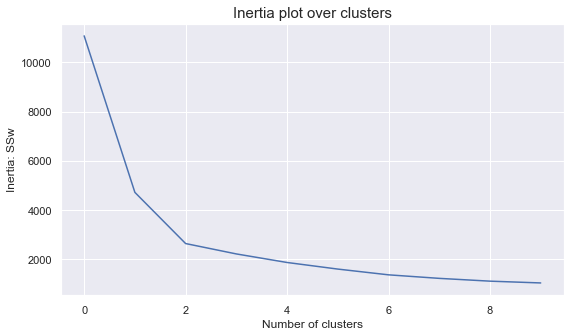

In [13]:
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=20, random_state=1)
    kmclust.fit(donors[new_d_metric])
    inertia.append(kmclust.inertia_)  
    
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

**Donors Final Clusters**

In [12]:
number_clusters = 3 
km2 = KMeans(n_clusters=number_clusters, init='k-means++', n_init=20, random_state=1)
km2_labels = km2.fit_predict(donors[new_d_metric])
km2_labels

array([0, 2, 0, ..., 2, 0, 0])

In [13]:
labels= pd.Series(km2_labels, name='labels')
labels

0        0
1        2
2        0
3        0
4        0
        ..
95407    1
95408    2
95409    2
95410    0
95411    0
Name: labels, Length: 95412, dtype: int32

In [14]:
donors.reset_index(inplace=True)
df_concat = pd.concat((donors, labels), axis=1)
df_concat.groupby('labels').mean()

CONTROLN       HIT     SOLP3      SOLIH  ADATE_2  ADATE_3  \
labels                                                                   
0        90847.389703  0.016708  9.990733  10.104051      0.0      0.0   
1       108080.456715  0.008983  9.990329  10.017626      0.0      0.0   
2        98433.158680  0.011868  9.990496  10.048194      0.0      0.0   

         ADATE_4  ADATE_5  ADATE_6   ADATE_7  ...  NGIFTALL  MINRDATE  \
labels                                        ...                       
0       0.000072      0.0      0.0  0.001059  ...  0.061355  0.311319   
1       0.000936      0.0      0.0  0.009203  ...  0.008249  0.095333   
2       0.000000      0.0      0.0  0.000358  ...  0.018453  0.129214   

        MAXRDATE  LASTDATE  FISTDATE  NEXTDATE   TIMELAG   AVGGIFT    RFA_2F  \
labels                                                                         
0       0.157674  0.803367  0.165315  0.395979  0.007709  0.010205  1.905529   
1       0.080005  0.740212  0.029653  0.090631  0.002479  0.016823  1.496646   
2       0.093406  0.790713  0.052420  0.191240  0.006310  0.013076  1.969866   

        OriginDate  
labels              
0        11.905769  
1         5.095617  
2         6.171956  

[3 rows x 40 columns]

In [15]:
df_concat.set_index('CONTROLN',inplace=True)

**Info Clustering**

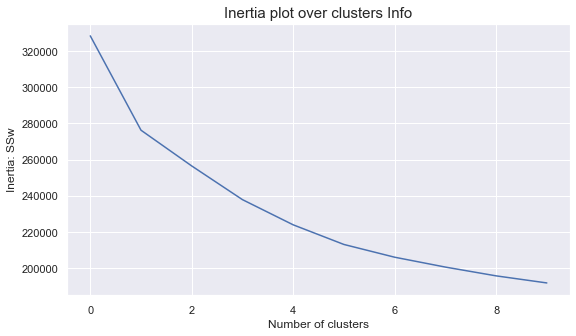

In [18]:
range_clusters2 = range(1, 11)

inertia2 = []
for n_clus in range_clusters2:  
    kmclusti = KMeans(n_clusters=n_clus, init='k-means++', n_init=20, random_state=1)
    kmclusti.fit(info[info_metric])
    inertia2.append(kmclusti.inertia_)  
    
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(inertia2)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters Info", size=15)
plt.show()

**Info Final Clusters**

In [16]:
number_clusters_i = 4
km3 = KMeans(n_clusters=number_clusters_i, init='k-means++', n_init=20, random_state=1)
km3_labels = km3.fit_predict(info[new_i_metric])
labels3= pd.Series(km3_labels, name='labels')
info.reset_index(inplace=True)
df_concat2 = pd.concat((info, labels3), axis=1)
df_concat2.groupby('labels').mean()

CONTROLN    INCOME   WEALTH1   MBCRAFT  MBGARDEN   MBBOOKS  \
labels                                                                    
0        83822.502407  0.451798  7.022510  0.008953  0.007306  0.043252   
1       106971.044627  0.697991  8.013084  0.011811  0.005225  0.061589   
2        96650.017647  0.444108  6.520509  0.013381  0.008941  0.054946   
3        94156.922015  0.324064  6.425371  0.011675  0.006152  0.059335   

        MBCOLECT   MAGFAML    MAGFEM   MAGMALE  ...      HC15      HC16  \
labels                                          ...                       
0       0.002302  0.014552  0.006800  0.004551  ...  0.003377  0.154617   
1       0.006725  0.027916  0.014534  0.011077  ...  0.002466  0.010766   
2       0.004198  0.021942  0.010979  0.006112  ...  0.002057  0.050768   
3       0.005098  0.023078  0.011892  0.006554  ...  0.001589  0.013543   

            HC17      HC19      HC20     MHUC1     MHUC2       AC1       AC2  \
labels                                                                         
0       0.512682  0.271006  0.984738  0.354448  0.446423  0.065716  0.065949   
1       0.958598  0.901463  0.999110  0.507887  0.543810  0.060348  0.058460   
2       0.858656  0.765300  0.938961  0.312024  0.410440  0.055566  0.060261   
3       0.966158  0.911121  0.996731  0.331108  0.435158  0.053381  0.057855   

             Age  
labels            
0       0.669185  
1       0.657296  
2       0.688804  
3       0.692225  

[4 rows x 230 columns]

In [17]:
df_concat2.set_index('CONTROLN',inplace=True)

<hr>
<a class="anchor" id="5.2.">
    
# 5.2. Hierarchical Clustering
    
</a>

## Donors 

In [19]:
d_cluster=donors[new_d_metric]
i_cluster= info[new_i_metric]
d_clusterhc=donors[new_d_metric].iloc[:20000,:] #A Donors Dataset with just 20K observations
i_clusterhc= info[new_i_metric].iloc[:20000,:] #An Info Dataset with just 20K observations.

In [20]:
hclust = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=3)
hc_labels = hclust.fit_predict(d_clusterhc)

In [21]:
df_hc = pd.concat((donors, pd.Series(hc_labels, name='labels')), axis=1)
df_hc.groupby('labels').mean()

CONTROLN       HIT     SOLP3      SOLIH  ADATE_2  ADATE_3  \
labels                                                                   
0.0     108416.455939  0.008903  9.995402  10.000000      0.0      0.0   
1.0      89917.540685  0.015552  9.981573  10.148773      0.0      0.0   
2.0     101100.032801  0.011499  9.989742   9.997018      0.0      0.0   

         ADATE_4  ADATE_5  ADATE_6   ADATE_7  ...  NGIFTALL  MINRDATE  \
labels                                        ...                       
0.0     0.000000      0.0      0.0  0.010728  ...  0.008942  0.094601   
1.0     0.000097      0.0      0.0  0.001164  ...  0.056734  0.293857   
2.0     0.000000      0.0      0.0  0.000119  ...  0.016317  0.117057   

        MAXRDATE  LASTDATE  FISTDATE  NEXTDATE   TIMELAG   AVGGIFT    RFA_2F  \
labels                                                                         
0.0     0.080077  0.734100  0.029722  0.091653  0.002488  0.017215  1.504981   
1.0     0.149915  0.792164  0.153018  0.375736  0.007630  0.010741  1.910678   
2.0     0.091462  0.799022  0.046205  0.178286  0.005919  0.012943  1.979127   

        OriginDate  
labels              
0.0       5.078161  
1.0      11.297061  
2.0       5.842677  

[3 rows x 40 columns]

In [22]:
# SST
X = d_clusterhc.values
sst = np.sum(np.square(X - X.mean(axis=0)), axis=0)

# SSW
ssw_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssw_iter.append(np.sum(np.square(X_k - X_k.mean(axis=0)), axis=0))
ssw = np.sum(ssw_iter, axis=0)

# Computing SSB
ssb_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssb_iter.append(X_k.shape[0] * np.square(X_k.mean(axis=0) - X.mean(axis=0)))
ssb = np.sum(ssb_iter, axis=0)

# Verifying the formula
np.round(sst) == np.round((ssw + ssb))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [23]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  
    
    sst = get_ss(df)  
    
    r2 = []  
    
    for i in range(min_nclus, max_nclus+1):  
        cluster = AgglomerativeClustering(n_clusters=i, affinity=dist, linkage=link_method)
        hclabels = cluster.fit_predict(df) 
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  
        ssb = sst - np.sum(ssw_labels)  
        r2.append(ssb / sst)  
        
    return np.array(r2)

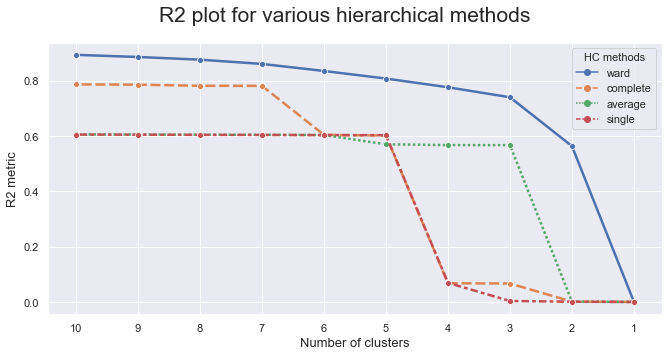

In [27]:
hc_methods = ["ward", "complete", "average", "single"]

max_nclus = 10
r2_hc_methods = np.vstack([get_r2_hc(df=d_clusterhc, link_method=link, max_nclus=max_nclus) for link in hc_methods]).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

**Dendrogram**

In [24]:
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(d_clusterhc)

array([19555, 15459, 10461, ...,     1,     2,     0], dtype=int64)

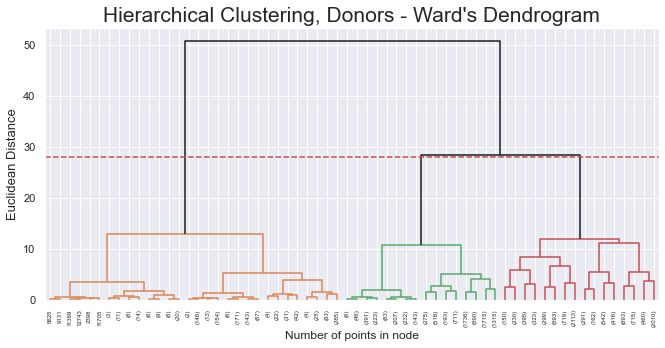

In [29]:
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Dendrogram plot
sns.set()
fig = plt.figure(figsize=(11,5))
# Tuning the parameters
y_threshold = 28
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering, Donors - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

The first big jump, defining a relatively large vertical distance where no clusters are intersected, was selected at the cutoff of 28. This indicates the existence of 4 clusters that can help segment the donors data.

**Donors Final HC solution**

In [25]:
hc_d_final= hc4lust = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=3)
hc_d_labels= hc_d_final.fit_predict(d_clusterhc)
hc_concat= pd.concat((donors,pd.Series(hc_d_labels, name='labels')), axis=1)
hc_concat.groupby('labels').mean()

CONTROLN       HIT     SOLP3      SOLIH  ADATE_2  ADATE_3  \
labels                                                                   
0.0     108416.455939  0.008903  9.995402  10.000000      0.0      0.0   
1.0      89917.540685  0.015552  9.981573  10.148773      0.0      0.0   
2.0     101100.032801  0.011499  9.989742   9.997018      0.0      0.0   

         ADATE_4  ADATE_5  ADATE_6   ADATE_7  ...  NGIFTALL  MINRDATE  \
labels                                        ...                       
0.0     0.000000      0.0      0.0  0.010728  ...  0.008942  0.094601   
1.0     0.000097      0.0      0.0  0.001164  ...  0.056734  0.293857   
2.0     0.000000      0.0      0.0  0.000119  ...  0.016317  0.117057   

        MAXRDATE  LASTDATE  FISTDATE  NEXTDATE   TIMELAG   AVGGIFT    RFA_2F  \
labels                                                                         
0.0     0.080077  0.734100  0.029722  0.091653  0.002488  0.017215  1.504981   
1.0     0.149915  0.792164  0.153018  0.375736  0.007630  0.010741  1.910678   
2.0     0.091462  0.799022  0.046205  0.178286  0.005919  0.012943  1.979127   

        OriginDate  
labels              
0.0       5.078161  
1.0      11.297061  
2.0       5.842677  

[3 rows x 40 columns]

# Info

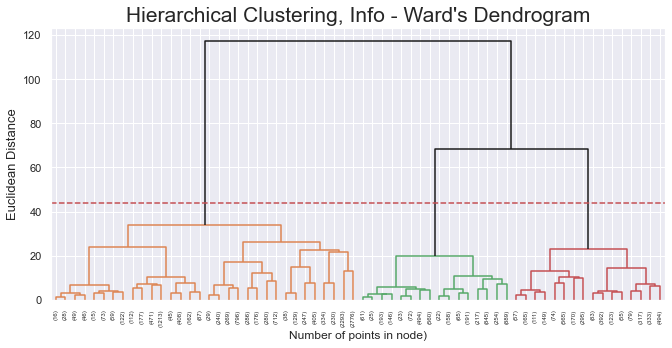

In [31]:
infoclust= AgglomerativeClustering(linkage='ward', affinity='euclidean', distance_threshold=0, n_clusters=None)
infoclust.fit_predict(i_clusterhc)
counts = np.zeros(infoclust.children_.shape[0])
n_samples = len(infoclust.labels_)

for i, merge in enumerate(infoclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  
        else:
            
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [infoclust.children_, infoclust.distances_, counts]
).astype(float)


sns.set()
fig = plt.figure(figsize=(11,5))

y_threshold = 44
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering, Info - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

**Info Final HC solution**

In [26]:
hc_i_final= AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=3)
hc_i_labels= hc_i_final.fit_predict(i_clusterhc)
hci_concat= pd.concat((info,pd.Series(hc_i_labels, name='labels')), axis=1)
hci_concat.groupby('labels').mean()

CONTROLN    INCOME   WEALTH1   MBCRAFT  MBGARDEN   MBBOOKS  \
labels                                                                    
0.0     100250.423842  0.505829  7.220157  0.011564  0.005214  0.058508   
1.0      93949.013865  0.442326  6.507221  0.012517  0.008449  0.049072   
2.0      84367.367260  0.443179  6.987426  0.008699  0.007770  0.045288   

        MBCOLECT   MAGFAML    MAGFEM   MAGMALE  ...      HC15      HC16  \
labels                                          ...                       
0.0     0.005613  0.024390  0.012870  0.008602  ...  0.001899  0.012746   
1.0     0.004285  0.019770  0.009070  0.006282  ...  0.001820  0.063095   
2.0     0.001700  0.014578  0.006643  0.004745  ...  0.003440  0.165899   

            HC17      HC19      HC20     MHUC1     MHUC2       AC1       AC2  \
labels                                                                         
0.0     0.944692  0.885681  0.984392  0.412454  0.481717  0.056171  0.057476   
1.0     0.873381  0.754005  0.995154  0.334984  0.434835  0.059637  0.064513   
2.0     0.487588  0.256014  0.983841  0.347252  0.442135  0.065713  0.067002   

             Age  
labels            
0.0     0.675827  
1.0     0.688015  
2.0     0.667856  

[3 rows x 230 columns]

<hr>
<a class="anchor" id="5.3.">
    
# 5.3. GMM
    
</a>

**Donors**

In [27]:
gmm = GaussianMixture(n_components=3, covariance_type='full', n_init=10, init_params='kmeans', random_state=1)
gmm_labels = gmm.fit_predict(d_cluster)
labels_proba = gmm.predict_proba(d_cluster)

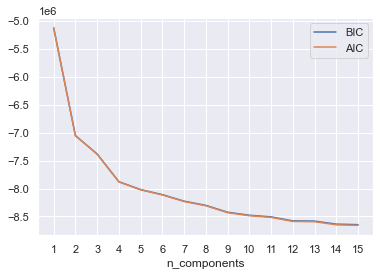

In [34]:
n_components = np.arange(1, 16)
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=1).fit(d_cluster)
          for n in n_components]

bic_values = [m.bic(d_cluster) for m in models]
aic_values = [m.aic(d_cluster) for m in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

In [28]:
df_concat = pd.concat([df_concat, pd.Series(gmm_labels, index=df_concat.index, name="gmm_labels")], axis=1)
sst = get_ss(data)  
ssw_labels = df_concat.groupby(by='gmm_labels').apply(get_ss)  
ssb = sst - np.sum(ssw_labels)  
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.5950


**Info**

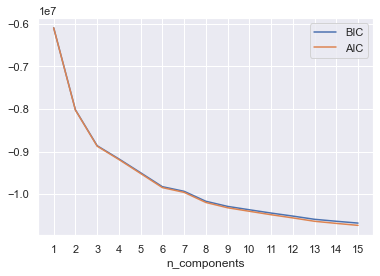

In [36]:
n_componentsi = np.arange(1, 16)
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=1).fit(i_cluster)
          for n in n_componentsi]

bic_values = [m.bic(i_cluster) for m in models]
aic_values = [m.aic(i_cluster) for m in models]
plt.plot(n_componentsi, bic_values, label='BIC')
plt.plot(n_componentsi, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_componentsi)
plt.show()

In [29]:
gmmi = GaussianMixture(n_components=4, covariance_type='full', n_init=10, init_params='kmeans', random_state=1)
gmmi_labels = gmmi.fit_predict(i_cluster)
labels_proba = gmmi.predict_proba(i_cluster)
df_concat2 = pd.concat([df_concat2, pd.Series(gmmi_labels, index=df_concat2.index, name="gmm_labels")], axis=1)
sst = get_ss(data)  
ssw_labels = df_concat2.groupby(by='gmm_labels').apply(get_ss)  
ssb = sst - np.sum(ssw_labels)  
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.4298


<hr>
<a class="anchor" id="5.4.">
    
# 5.4. DBScan
    
</a>

**Donors**

In [30]:
dbscan = DBSCAN(eps=0.15, min_samples=25, n_jobs=4)
dbscan_labels = dbscan.fit_predict(d_clusterhc)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 4


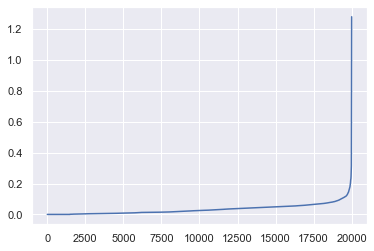

In [39]:
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(d_clusterhc)
distances, _ = neigh.kneighbors(d_clusterhc)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

In [31]:
dbs_concat = pd.concat([d_clusterhc, pd.Series(dbscan_labels, index=d_clusterhc.index, name="dbscan_labels")], axis=1)
dbs_concat.head()

NUMPRM12  RAMNTALL  NGIFTALL   TIMELAG   AVGGIFT  ADATE_8  ADATE_9  \
0  0.168831  0.023965  0.127119  0.003676  0.006465      0.0      0.0   
1  0.155844  0.003590  0.008475  0.016544  0.014399      0.0      0.0   
2  0.168831  0.019954  0.110169  0.011029  0.006204      0.0      0.0   
3  0.168831  0.010135  0.063559  0.008272  0.005534      0.0      0.0   
4  0.311688  0.025443  0.152542  0.012868  0.005586      0.0      0.0   

   MAXADATE  MINRDATE  MAXRDATE  FISTDATE  NEXTDATE  dbscan_labels  
0       0.0  0.227273  0.136364  0.148936  0.357143              0  
1       0.0  0.181818  0.090909  0.063830  0.178571              0  
2       0.0  0.272727  0.227273  0.127660  0.321429              0  
3       0.0  0.454545  0.136364  0.191489  0.464286              0  
4       0.0  0.181818  0.045455  0.361702  0.714286             -1

In [32]:
dbs_concat.loc[dbs_concat['dbscan_labels'] == -1]

NUMPRM12  RAMNTALL  NGIFTALL   TIMELAG   AVGGIFT  ADATE_8  ADATE_9  \
4      0.311688  0.025443  0.152542  0.012868  0.005586      0.0      0.0   
30     0.012987  0.005807  0.042373  0.008272  0.004902      1.0      0.0   
118    0.454545  0.142948  0.135593  0.010110  0.040190      0.0      0.0   
443    0.467532  0.130392  0.296610  0.000919  0.016314      0.0      0.0   
500    0.675325  0.028188  0.127119  0.028493  0.007757      0.0      0.0   
...         ...       ...       ...       ...       ...      ...      ...   
19631  0.519481  0.007285  0.016949  0.001838  0.015134      1.0      0.0   
19644  0.337662  0.009502  0.000000  0.000000  0.101845      0.0      0.0   
19664  0.714286  0.021643  0.097458  0.009191  0.007808      0.0      0.0   
19789  0.012987  0.021432  0.097458  0.003676  0.007724      1.0      0.0   
19849  0.051948  0.069362  0.169492  0.002757  0.015075      1.0      0.0   

       MAXADATE  MINRDATE  MAXRDATE  FISTDATE  NEXTDATE  dbscan_labels  
4           0.0  0.181818  0.045455  0.361702  0.714286             -1  
30          1.0  0.318182  0.181818  0.127660  0.321429             -1  
118         0.0  0.272727  0.500000  0.276596  0.571429             -1  
443         0.0  0.363636  0.136364  0.191489  0.464286             -1  
500         0.0  0.045455  0.363636  0.148936  0.285714             -1  
...         ...       ...       ...       ...       ...            ...  
19631       0.0  0.000000  0.090909  0.021277  0.178571             -1  
19644       0.0  0.090909  0.090909  0.021277  0.000000             -1  
19664       0.0  0.181818  0.181818  0.148936  0.357143             -1  
19789       1.0  0.272727  0.318182  0.170213  0.428571             -1  
19849       0.0  0.136364  0.136364  0.170213  0.428571             -1  

[98 rows x 13 columns]

In [33]:
df_nonoise = dbs_concat.loc[dbs_concat['dbscan_labels'] != -1]
sst = get_ss(d_clusterhc)  
ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  
ssb = sst - np.sum(ssw_labels)  
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.6124


In [34]:
dbs_concat.groupby('dbscan_labels').mean()

NUMPRM12  RAMNTALL  NGIFTALL   TIMELAG   AVGGIFT   ADATE_8  \
dbscan_labels                                                               
-1             0.261861  0.050975  0.107835  0.006987  0.042142  0.540816   
 0             0.155848  0.009939  0.038321  0.006865  0.011600  0.000000   
 1             0.123306  0.002222  0.005784  0.002089  0.017177  1.000000   
 2             0.038050  0.005899  0.019254  0.005499  0.013514  1.000000   

               ADATE_9  MAXADATE  MINRDATE  MAXRDATE  FISTDATE  NEXTDATE  
dbscan_labels                                                             
-1                 0.0  0.285714  0.231447  0.199443  0.169561  0.383017  
 0                 0.0  0.000000  0.214423  0.123467  0.104859  0.286754  
 1                 0.0  0.000000  0.088080  0.074853  0.023674  0.076144  
 2                 0.0  1.000000  0.125199  0.090112  0.051138  0.189850

**Info**

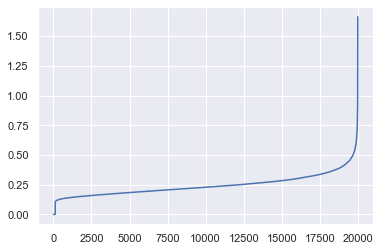

In [44]:
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(i_clusterhc)
distances, _ = neigh.kneighbors(i_clusterhc)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

In [35]:
dbscani = DBSCAN(eps=0.46, min_samples=100, n_jobs=4)
dbscani_labels = dbscani.fit_predict(i_clusterhc)

dbscani_n_clusters = len(np.unique(dbscani_labels))
print("Number of estimated clusters : %d" % dbscani_n_clusters)

Number of estimated clusters : 3


In [36]:
dbsi_concat = pd.concat([i_clusterhc, pd.Series(dbscani_labels, index=i_clusterhc.index, name="dbscan_labels")], axis=1)
dbsi_concat.loc[dbsi_concat['dbscan_labels'] == -1]

INCOME    POP901   POP90C1   POP90C2   POP90C3      ETH2      ETH4  \
15     0.000000  0.025724  1.000000  0.000000  0.000000  0.595960  0.050505   
181    0.166667  0.015471  0.000000  0.696970  0.313131  1.000000  0.000000   
208    0.000000  0.010669  1.000000  0.000000  0.000000  0.242424  0.000000   
250    0.500000  0.619872  1.000000  0.000000  0.000000  0.535354  0.010101   
321    0.333333  0.620166  0.979798  0.000000  0.030303  0.030303  0.555556   
...         ...       ...       ...       ...       ...       ...       ...   
19427  0.000000  0.005562  0.000000  0.000000  1.000000  0.010101  0.010101   
19761  0.500000  0.000020  0.000000  0.000000  0.000000  1.000000  0.000000   
19801  0.500000  0.003718  1.000000  0.000000  0.000000  0.101010  0.111111   
19925  1.000000  0.012340  0.000000  0.989899  0.020202  0.000000  0.010101   
19939  0.500000  0.006403  0.000000  1.000000  0.000000  0.939394  0.000000   

           ETH5     AGEC5     AGEC7  ...      PEC1      OCC1      OCC3  \
15     0.050505  0.171717  0.080808  ...  0.000000  0.242424  0.030303   
181    0.000000  0.090909  0.080808  ...  0.000000  0.121212  0.000000   
208    0.777778  0.070707  0.040404  ...  0.000000  0.030303  0.000000   
250    0.494949  0.080808  0.040404  ...  0.000000  0.050505  0.020202   
321    0.080808  0.111111  0.040404  ...  0.020202  0.161616  0.040404   
...         ...       ...       ...  ...       ...       ...       ...   
19427  0.020202  0.222222  0.181818  ...  0.131313  0.101010  0.040404   
19761  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
19801  0.484848  0.050505  0.040404  ...  0.000000  0.000000  0.020202   
19925  0.070707  0.080808  0.030303  ...  0.050505  0.252525  0.030303   
19939  0.000000  0.121212  0.090909  ...  0.000000  0.080808  0.000000   

           OCC7      OCC9     OCC11     OCC13     POBC1       HC1  \
15     0.090909  0.000000  0.040404  0.030303  0.070707  0.354839   
181    0.000000  0.000000  0.222222  0.000000  0.000000  0.225806   
208    0.072727  0.050505  0.242424  0.080808  0.585859  0.129032   
250    0.036364  0.020202  0.202020  0.080808  0.333333  0.161290   
321    0.054545  0.020202  0.020202  0.030303  0.060606  0.161290   
...         ...       ...       ...       ...       ...       ...   
19427  0.000000  0.050505  0.000000  0.000000  0.090909  0.225806   
19761  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19801  0.000000  0.000000  0.616162  0.040404  0.363636  0.129032   
19925  0.018182  0.030303  0.020202  0.010101  0.101010  0.161290   
19939  0.127273  0.000000  0.252525  0.121212  0.000000  0.516129   

       dbscan_labels  
15                -1  
181               -1  
208               -1  
250               -1  
321               -1  
...              ...  
19427             -1  
19761             -1  
19801             -1  
19925             -1  
19939             -1  

[239 rows x 27 columns]

In [37]:
dfi_nonoise = dbsi_concat.loc[dbsi_concat['dbscan_labels'] != -1]
sst = get_ss(i_clusterhc)  
ssw_labels = dfi_nonoise.groupby(by='dbscan_labels').apply(get_ss)  
ssb = sst - np.sum(ssw_labels)  
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.0333


<hr>
<a class="anchor" id="5.5.">
    
# 5.5. Self Organizing Maps
    
</a>

**Donors**

In [38]:
np.random.seed(42)

sm = sompy.SOMFactory().build(
    d_clusterhc.values, 
    mapsize=(10, 10),
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=new_d_metric
)
sm.train(n_job=4, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.001000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  0.113000, quantization error: 12.048082

 epoch: 2 ---> elapsed time:  0.104000, quantization error: 2.738299

 epoch: 3 ---> elapsed time:  0.101000, quantization error: 2.609544

 epoch: 4 ---> elapsed time:  0.120000, quantization error: 2.479719

 epoch: 5 ---> elapsed time:  0.134000, quantization error: 2.451196

 epoch: 6 ---> elapsed time:  0.112000, quantization error: 2.443418

 epoch: 7 ---> elapsed time:  0.094000, quantization error: 2.439348

 epoch: 8 ---> elapsed time:  0.091000, quantization error: 2.435449

 epoch: 9 ---> elapsed time:  0.094000, quantization error: 2.431484

 epoch: 10 ---> elapsed time:  0.097000, quantization error: 2.427459

 epoch: 11 ---> elapsed time:  0.091000, quantization error: 2.423382

 epoch: 12 ---> elapsed time:  0.094000, quantization error: 2.419246

 epoch: 13 --->

 epoch: 14 ---> elapsed time:  0.086000, quantization error: 1.388440

 epoch: 15 ---> elapsed time:  0.087000, quantization error: 1.388412

 epoch: 16 ---> elapsed time:  0.083000, quantization error: 1.388399

 epoch: 17 ---> elapsed time:  0.083000, quantization error: 1.388356

 epoch: 18 ---> elapsed time:  0.084000, quantization error: 1.388359

 epoch: 19 ---> elapsed time:  0.082000, quantization error: 1.388347

 epoch: 20 ---> elapsed time:  0.088000, quantization error: 1.388346

 epoch: 21 ---> elapsed time:  0.087000, quantization error: 1.388331

 epoch: 22 ---> elapsed time:  0.083000, quantization error: 1.388347

 epoch: 23 ---> elapsed time:  0.084000, quantization error: 1.388328

 epoch: 24 ---> elapsed time:  0.083000, quantization error: 1.388355

 epoch: 25 ---> elapsed time:  0.082000, quantization error: 1.388380

 epoch: 26 ---> elapsed time:  0.083000, quantization error: 1.388397

 epoch: 27 ---> elapsed time:  0.086000, quantization error: 1.388413

 epoch

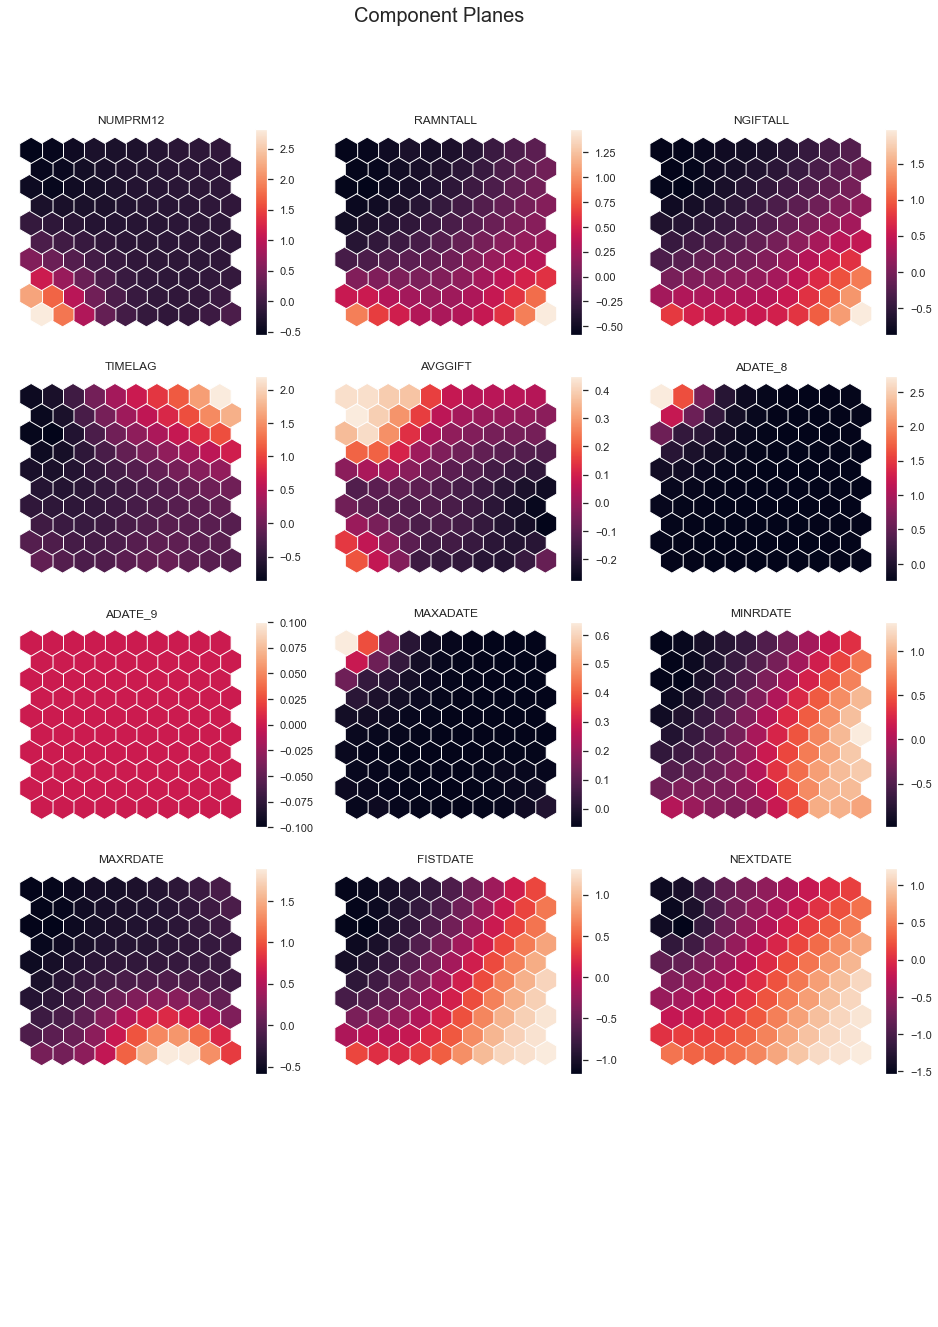

In [39]:
sns.set()
view2D = View2D(12,12,"", text_size=10)
view2D.show(sm, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

**Info**

In [40]:
np.random.seed(42)

sm = sompy.SOMFactory().build(
    i_clusterhc.values, 
    mapsize=(10, 10),
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=new_i_metric
)
sm.train(n_job=4, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.001000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  0.177000, quantization error: 27.499568

 epoch: 2 ---> elapsed time:  0.120000, quantization error: 4.725033

 epoch: 3 ---> elapsed time:  0.313000, quantization error: 4.674456

 epoch: 4 ---> elapsed time:  0.148000, quantization error: 4.603214

 epoch: 5 ---> elapsed time:  0.092000, quantization error: 4.576904

 epoch: 6 ---> elapsed time:  0.092000, quantization error: 4.565341

 epoch: 7 ---> elapsed time:  0.098000, quantization error: 4.558707

 epoch: 8 ---> elapsed time:  0.457000, quantization error: 4.552617

 epoch: 9 ---> elapsed time:  0.090000, quantization error: 4.546185

 epoch: 10 ---> elapsed time:  0.093000, quantization error: 4.538397

 epoch: 11 ---> elapsed time:  0.096000, quantization error: 4.532096

 epoch: 12 ---> elapsed time:  0.106000, quantization error: 4.527881

 epoch: 13 --->

 epoch: 14 ---> elapsed time:  0.090000, quantization error: 3.446430

 epoch: 15 ---> elapsed time:  0.092000, quantization error: 3.446379

 epoch: 16 ---> elapsed time:  0.092000, quantization error: 3.446326

 epoch: 17 ---> elapsed time:  0.104000, quantization error: 3.446275

 epoch: 18 ---> elapsed time:  0.084000, quantization error: 3.446206

 epoch: 19 ---> elapsed time:  0.088000, quantization error: 3.446124

 epoch: 20 ---> elapsed time:  0.085000, quantization error: 3.446019

 epoch: 21 ---> elapsed time:  0.086000, quantization error: 3.445917

 epoch: 22 ---> elapsed time:  0.088000, quantization error: 3.445860

 epoch: 23 ---> elapsed time:  0.088000, quantization error: 3.445768

 epoch: 24 ---> elapsed time:  0.096000, quantization error: 3.445707

 epoch: 25 ---> elapsed time:  0.099000, quantization error: 3.445660

 epoch: 26 ---> elapsed time:  0.088000, quantization error: 3.445607

 epoch: 27 ---> elapsed time:  0.087000, quantization error: 3.445592

 epoch

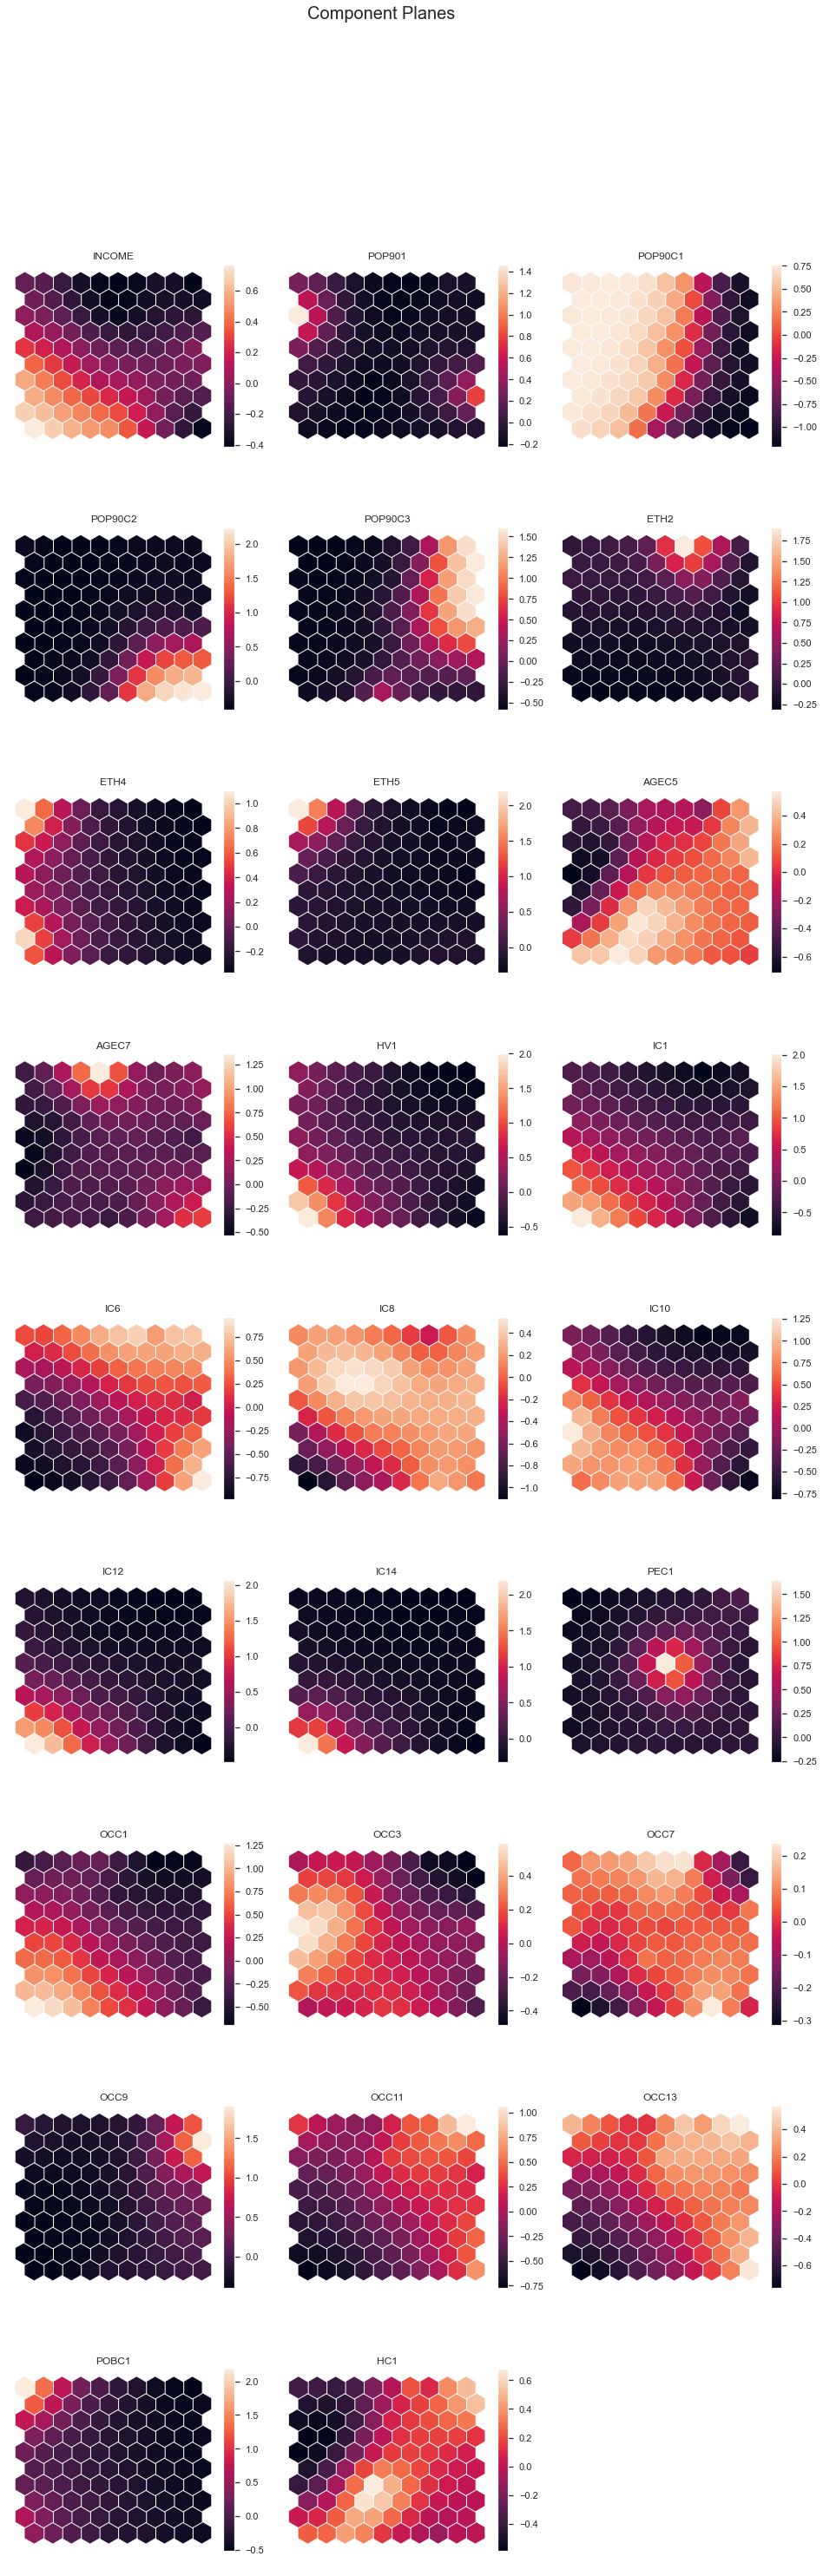

In [41]:
sns.set()
view2D = View2D(12,12,"", text_size=10)
view2D.show(sm, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

<hr>
<a class="anchor" id="5.6.">
    
# 5.6. SOM with K-Means
    
</a>

**Donors**

In [42]:
np.random.seed(42)
sm = sompy.SOMFactory().build(
    d_clusterhc.values, 
    mapsize=(50, 50), 
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=new_d_metric
)
sm.train(n_job=4, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.002000 seconds
 Rough training...
 radius_ini: 17.000000 , radius_final: 2.833333, trainlen: 100

 epoch: 1 ---> elapsed time:  0.924000, quantization error: 7.714888

 epoch: 2 ---> elapsed time:  0.988000, quantization error: 2.739364

 epoch: 3 ---> elapsed time:  1.009000, quantization error: 2.703580

 epoch: 4 ---> elapsed time:  1.072000, quantization error: 2.651511

 epoch: 5 ---> elapsed time:  1.071000, quantization error: 2.644155

 epoch: 6 ---> elapsed time:  1.033000, quantization error: 2.641698

 epoch: 7 ---> elapsed time:  1.052000, quantization error: 2.639106

 epoch: 8 ---> elapsed time:  0.999000, quantization error: 2.637332

 epoch: 9 ---> elapsed time:  0.961000, quantization error: 2.635566

 epoch: 10 ---> elapsed time:  1.004000, quantization error: 2.633761

 epoch: 11 ---> elapsed time:  1.012000, quantization error: 2.631910

 epoch: 12 ---> elapsed time:  0.963000, quantization error: 2.630011

 epoch: 13 --->

 epoch: 14 ---> elapsed time:  0.988000, quantization error: 1.874028

 epoch: 15 ---> elapsed time:  1.004000, quantization error: 1.866487

 epoch: 16 ---> elapsed time:  1.022000, quantization error: 1.858676

 epoch: 17 ---> elapsed time:  1.019000, quantization error: 1.850577

 epoch: 18 ---> elapsed time:  1.093000, quantization error: 1.842389

 epoch: 19 ---> elapsed time:  1.071000, quantization error: 1.834124

 epoch: 20 ---> elapsed time:  1.015000, quantization error: 1.825592

 epoch: 21 ---> elapsed time:  1.007000, quantization error: 1.816924

 epoch: 22 ---> elapsed time:  0.961000, quantization error: 1.808478

 epoch: 23 ---> elapsed time:  0.972000, quantization error: 1.799784

 epoch: 24 ---> elapsed time:  0.983000, quantization error: 1.790883

 epoch: 25 ---> elapsed time:  1.136000, quantization error: 1.782069

 epoch: 26 ---> elapsed time:  1.087000, quantization error: 1.772865

 epoch: 27 ---> elapsed time:  0.984000, quantization error: 1.763516

 epoch

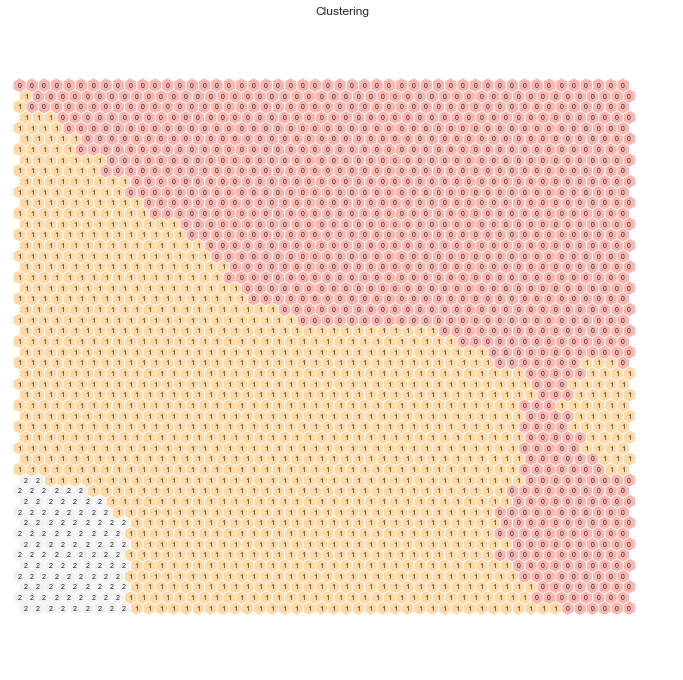

In [43]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20, random_state=1)
nodeclus_labels = sm.cluster(kmeans)

hits  = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

**Donors Final K-Means SOM**

In [44]:
nodes = sm.get_node_vectors()
df_nodes = pd.DataFrame(nodes, columns=new_d_metric)
df_nodes['label'] = nodeclus_labels
df_nodes

NUMPRM12  RAMNTALL  NGIFTALL   TIMELAG   AVGGIFT   ADATE_8  ADATE_9  \
0     0.433865  0.063597  0.171943  0.005364  0.014639  0.008552      0.0   
1     0.441678  0.048516  0.148803  0.006001  0.012551  0.004455      0.0   
2     0.446741  0.036766  0.124582  0.006522  0.011244  0.001897      0.0   
3     0.429491  0.030525  0.107809  0.006758  0.010780  0.001076      0.0   
4     0.414619  0.024628  0.095284  0.006575  0.009929  0.000693      0.0   
...        ...       ...       ...       ...       ...       ...      ...   
2495  0.140068  0.010600  0.039186  0.023655  0.011165  0.001881      0.0   
2496  0.143857  0.010390  0.037809  0.026467  0.011392  0.005666      0.0   
2497  0.150427  0.010441  0.035845  0.030099  0.011964  0.012290      0.0   
2498  0.157932  0.011046  0.035356  0.033428  0.012865  0.022748      0.0   
2499  0.162468  0.009959  0.029780  0.036942  0.014211  0.054466      0.0   

          MAXADATE  MINRDATE  MAXRDATE  FISTDATE  NEXTDATE  label  
0     1.606712e-11  0.286095  0.190883  0.191677  0.447092      0  
1     1.606712e-11  0.260878  0.194351  0.181821  0.428071      0  
2     1.606712e-11  0.235607  0.211267  0.176927  0.417275      0  
3     1.606712e-11  0.215736  0.180374  0.167641  0.402047      0  
4     1.606712e-11  0.173738  0.159170  0.160222  0.391839      0  
...            ...       ...       ...       ...       ...    ...  
2495  1.606712e-11  0.279417  0.205075  0.166774  0.345146      0  
2496  1.606712e-11  0.275862  0.175436  0.163788  0.332570      0  
2497  1.606712e-11  0.285144  0.143855  0.161625  0.318378      0  
2498  1.606712e-11  0.292350  0.124565  0.160178  0.305484      0  
2499  1.606712e-11  0.265604  0.123389  0.153385  0.282182      0  

[2500 rows x 13 columns]

In [45]:
print(sm._bmu.shape)
print(sm._bmu[0])
#Best matching unit of each observation.

(2, 20000)
[2360. 1897. 1362. ... 1019. 2476. 1185.]


In [46]:
df_bmus = pd.DataFrame(
    np.concatenate((d_clusterhc, np.expand_dims(sm._bmu[0],1)), axis=1),
    index=d_clusterhc.index, columns=np.append(d_clusterhc.columns,"BMU")
)
df_bmus

NUMPRM12  RAMNTALL  NGIFTALL   TIMELAG   AVGGIFT  ADATE_8  ADATE_9  \
0      0.168831  0.023965  0.127119  0.003676  0.006465      0.0      0.0   
1      0.155844  0.003590  0.008475  0.016544  0.014399      0.0      0.0   
2      0.168831  0.019954  0.110169  0.011029  0.006204      0.0      0.0   
3      0.168831  0.010135  0.063559  0.008272  0.005534      0.0      0.0   
4      0.311688  0.025443  0.152542  0.012868  0.005586      0.0      0.0   
...         ...       ...       ...       ...       ...      ...      ...   
19995  0.129870  0.000211  0.000000  0.000000  0.013732      1.0      0.0   
19996  0.181818  0.007073  0.067797  0.008272  0.003425      0.0      0.0   
19997  0.064935  0.006440  0.055085  0.002757  0.004005      0.0      0.0   
19998  0.077922  0.013091  0.080508  0.011029  0.005571      0.0      0.0   
19999  0.142857  0.003273  0.012712  0.005515  0.009727      0.0      0.0   

       MAXADATE  MINRDATE  MAXRDATE  FISTDATE  NEXTDATE     BMU  
0           0.0  0.227273  0.136364  0.148936  0.357143  2360.0  
1           0.0  0.181818  0.090909  0.063830  0.178571  1897.0  
2           0.0  0.272727  0.227273  0.127660  0.321429  1362.0  
3           0.0  0.454545  0.136364  0.191489  0.464286  2478.0  
4           0.0  0.181818  0.045455  0.361702  0.714286   151.0  
...         ...       ...       ...       ...       ...     ...  
19995       0.0  0.045455  0.045455  0.000000  0.000000   144.0  
19996       0.0  0.090909  0.136364  0.085106  0.285714  1065.0  
19997       0.0  0.136364  0.045455  0.085106  0.285714  1019.0  
19998       0.0  0.363636  0.136364  0.170213  0.392857  2476.0  
19999       0.0  0.181818  0.090909  0.063830  0.214286  1185.0  

[20000 rows x 13 columns]

In [47]:
df_final = df_bmus.merge(df_nodes['label'], 'left', left_on="BMU", right_index=True)
df_final

NUMPRM12  RAMNTALL  NGIFTALL   TIMELAG   AVGGIFT  ADATE_8  ADATE_9  \
0      0.168831  0.023965  0.127119  0.003676  0.006465      0.0      0.0   
1      0.155844  0.003590  0.008475  0.016544  0.014399      0.0      0.0   
2      0.168831  0.019954  0.110169  0.011029  0.006204      0.0      0.0   
3      0.168831  0.010135  0.063559  0.008272  0.005534      0.0      0.0   
4      0.311688  0.025443  0.152542  0.012868  0.005586      0.0      0.0   
...         ...       ...       ...       ...       ...      ...      ...   
19995  0.129870  0.000211  0.000000  0.000000  0.013732      1.0      0.0   
19996  0.181818  0.007073  0.067797  0.008272  0.003425      0.0      0.0   
19997  0.064935  0.006440  0.055085  0.002757  0.004005      0.0      0.0   
19998  0.077922  0.013091  0.080508  0.011029  0.005571      0.0      0.0   
19999  0.142857  0.003273  0.012712  0.005515  0.009727      0.0      0.0   

       MAXADATE  MINRDATE  MAXRDATE  FISTDATE  NEXTDATE     BMU  label  
0           0.0  0.227273  0.136364  0.148936  0.357143  2360.0      0  
1           0.0  0.181818  0.090909  0.063830  0.178571  1897.0      1  
2           0.0  0.272727  0.227273  0.127660  0.321429  1362.0      0  
3           0.0  0.454545  0.136364  0.191489  0.464286  2478.0      0  
4           0.0  0.181818  0.045455  0.361702  0.714286   151.0      0  
...         ...       ...       ...       ...       ...     ...    ...  
19995       0.0  0.045455  0.045455  0.000000  0.000000   144.0      2  
19996       0.0  0.090909  0.136364  0.085106  0.285714  1065.0      1  
19997       0.0  0.136364  0.045455  0.085106  0.285714  1019.0      1  
19998       0.0  0.363636  0.136364  0.170213  0.392857  2476.0      0  
19999       0.0  0.181818  0.090909  0.063830  0.214286  1185.0      1  

[20000 rows x 14 columns]

In [48]:
df_final.drop(columns='BMU').groupby('label').mean()

NUMPRM12  RAMNTALL  NGIFTALL   TIMELAG   AVGGIFT   ADATE_8  ADATE_9  \
label                                                                        
0      0.163086  0.015687  0.062705  0.007482  0.010000  0.001505      0.0   
1      0.150872  0.005380  0.017994  0.006345  0.013300  0.000992      0.0   
2      0.118879  0.002851  0.008134  0.002311  0.016604  0.995320      0.0   

       MAXADATE  MINRDATE  MAXRDATE  FISTDATE  NEXTDATE  
label                                                    
0      0.000000  0.311804  0.158559  0.165501  0.396892  
1      0.000000  0.131182  0.093912  0.053375  0.193052  
2      0.066303  0.092930  0.078641  0.028330  0.089119

This method was not further applied to Info, as the group figured the analysis would be redundant (compared to the original K-Means) and still computationally inefficient, on an even larger dataset.

## Quick Cluster Analysis (before further investigation)

For the donors and the HC, the following ideas can be concluded:
- Variables NUMPRM12, RAMNTALL, NGIFTALL, TIMELAG, AVGGIFT, ADATE_2-> have very similar values altogether.
- Cluster 3 has a higher ADATE_8. Cluster 2 has a very high ADATE_9.
- ADATE_19 seems to be very relevant in distinguishing 3, 2 and 0. 
- Several clusters have high ADATE_23. 
- Keep MAX_ADATE, MINRDATE, LASTDATE,MAXRDATE, FISTDATE and NEXTDATE. 

<hr>
<a class="anchor" id="5.7.">
    
# 5.7. Feature Importance using R2
    
</a>

In [49]:
r2_variables(hc_concat[donors_metric + ['labels']],'labels').drop('labels')

HIT         0.804166
NUMPRM12    0.805063
RAMNTALL    0.805990
NGIFTALL    0.856359
TIMELAG     0.879995
AVGGIFT     0.701995
ADATE_2          NaN
ADATE_3          NaN
ADATE_4     0.888889
ADATE_5          NaN
ADATE_6          NaN
ADATE_7     0.776087
ADATE_8     0.999001
ADATE_9          NaN
ADATE_10         NaN
ADATE_11         NaN
ADATE_12         NaN
ADATE_13         NaN
ADATE_14         NaN
ADATE_15         NaN
ADATE_16         NaN
ADATE_17         NaN
ADATE_18    0.795229
ADATE_19         NaN
ADATE_20         NaN
ADATE_21         NaN
ADATE_22    0.797591
ADATE_23    0.863657
ADATE_24         NaN
MAXADATE    0.795411
MINRDATE    0.903472
MAXRDATE    0.820885
LASTDATE    0.790685
FISTDATE    0.926782
NEXTDATE    0.917590
dtype: float64

In [50]:
r2_variables(hci_concat[info_metric + ['labels']],'labels').drop('labels')

INCOME      0.792844
MALEMILI    0.763039
MALEVET     0.789905
VIETVETS    0.790096
WWIIVETS    0.792689
              ...   
PUBDOITY    0.780756
PUBNEWFN    0.805715
PUBPHOTO    0.811557
PUBOPP      0.799790
Age         0.789444
Length: 226, dtype: float64

<hr>
<a class="anchor" id="5.8.">
    
# 5.8. Cluster Visualization
    
</a>

## Donors (K-Means, HC, GMM, DBScan and SOM w/K-Means)

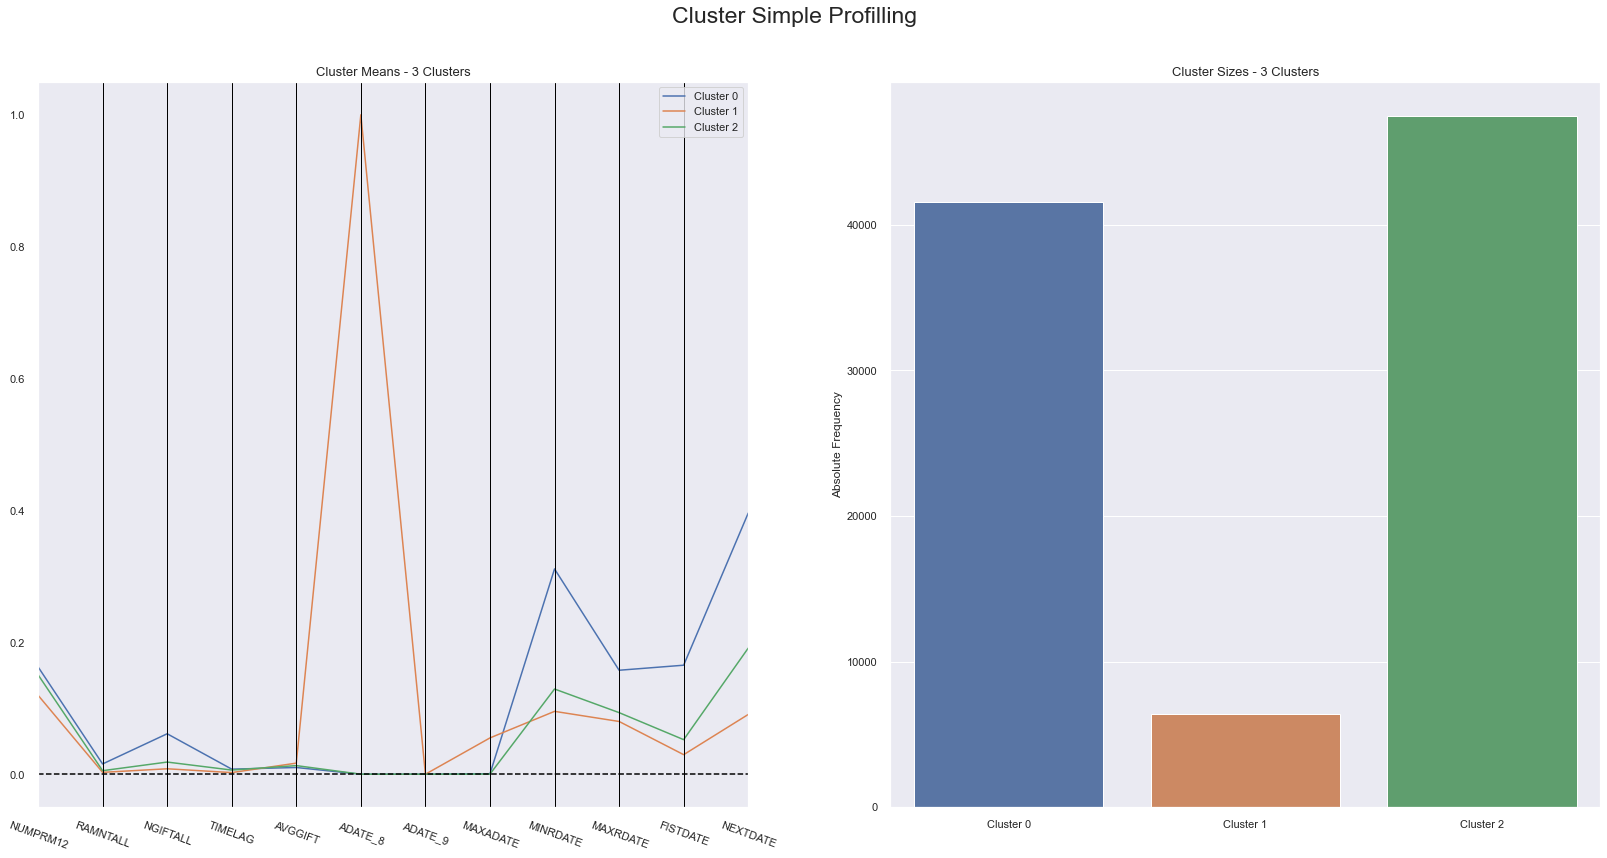

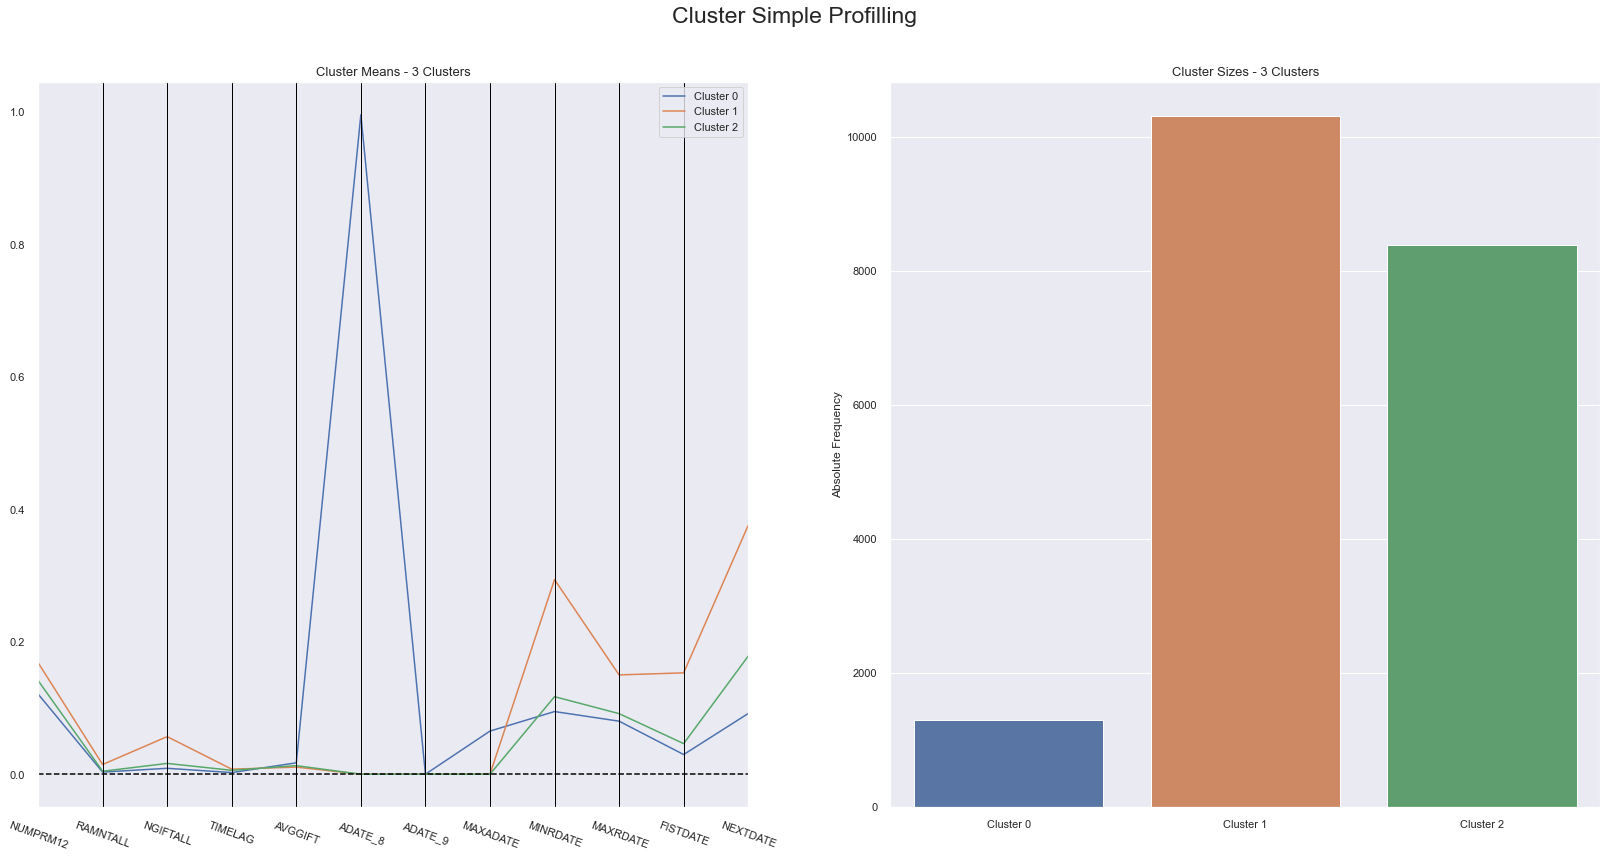

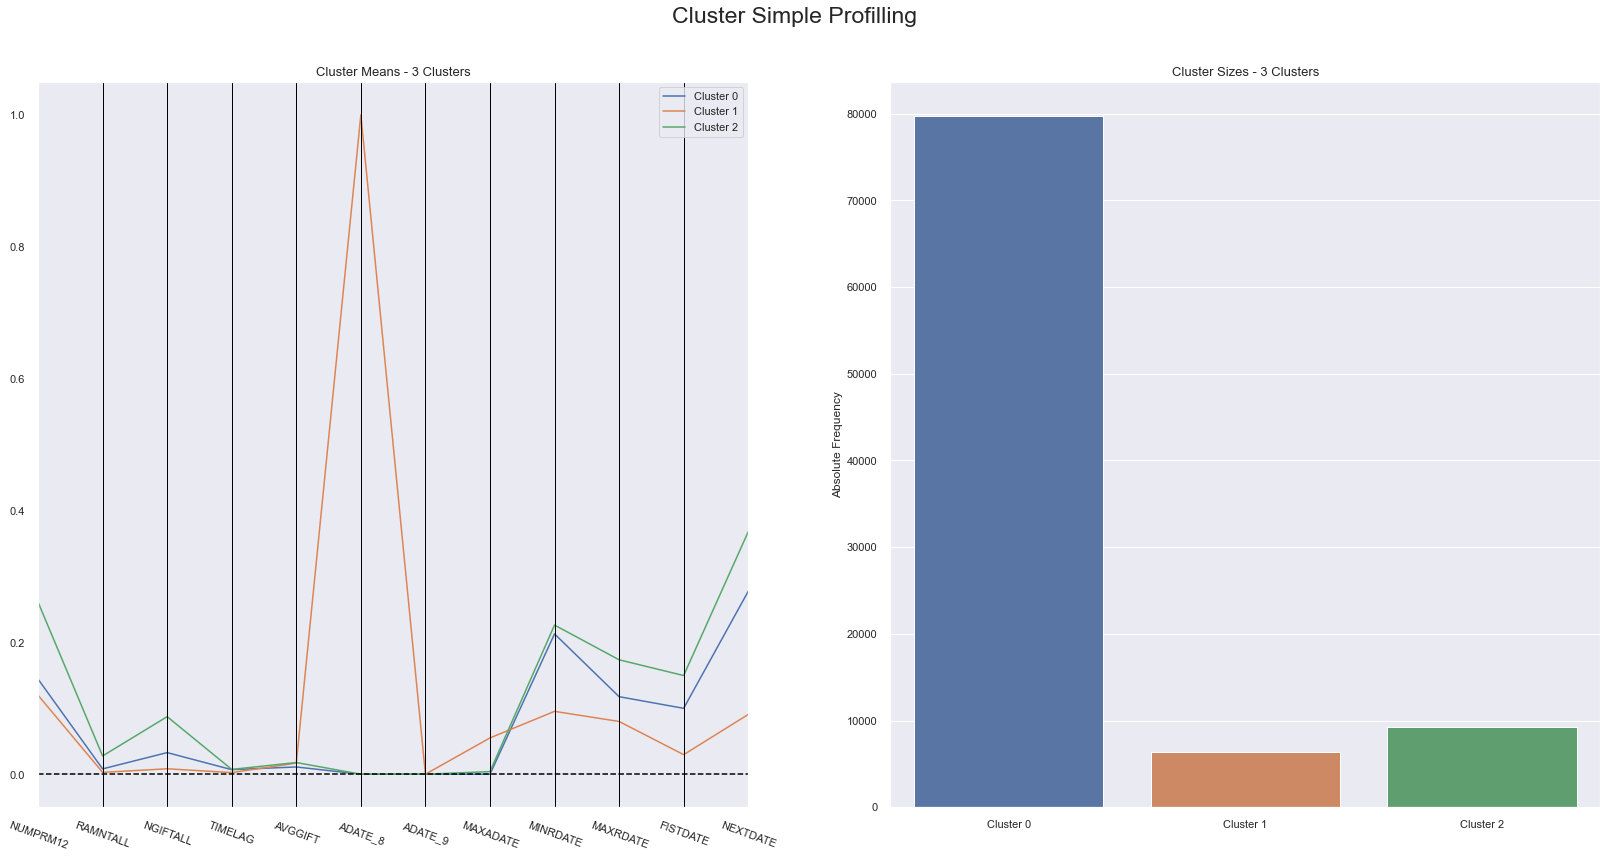

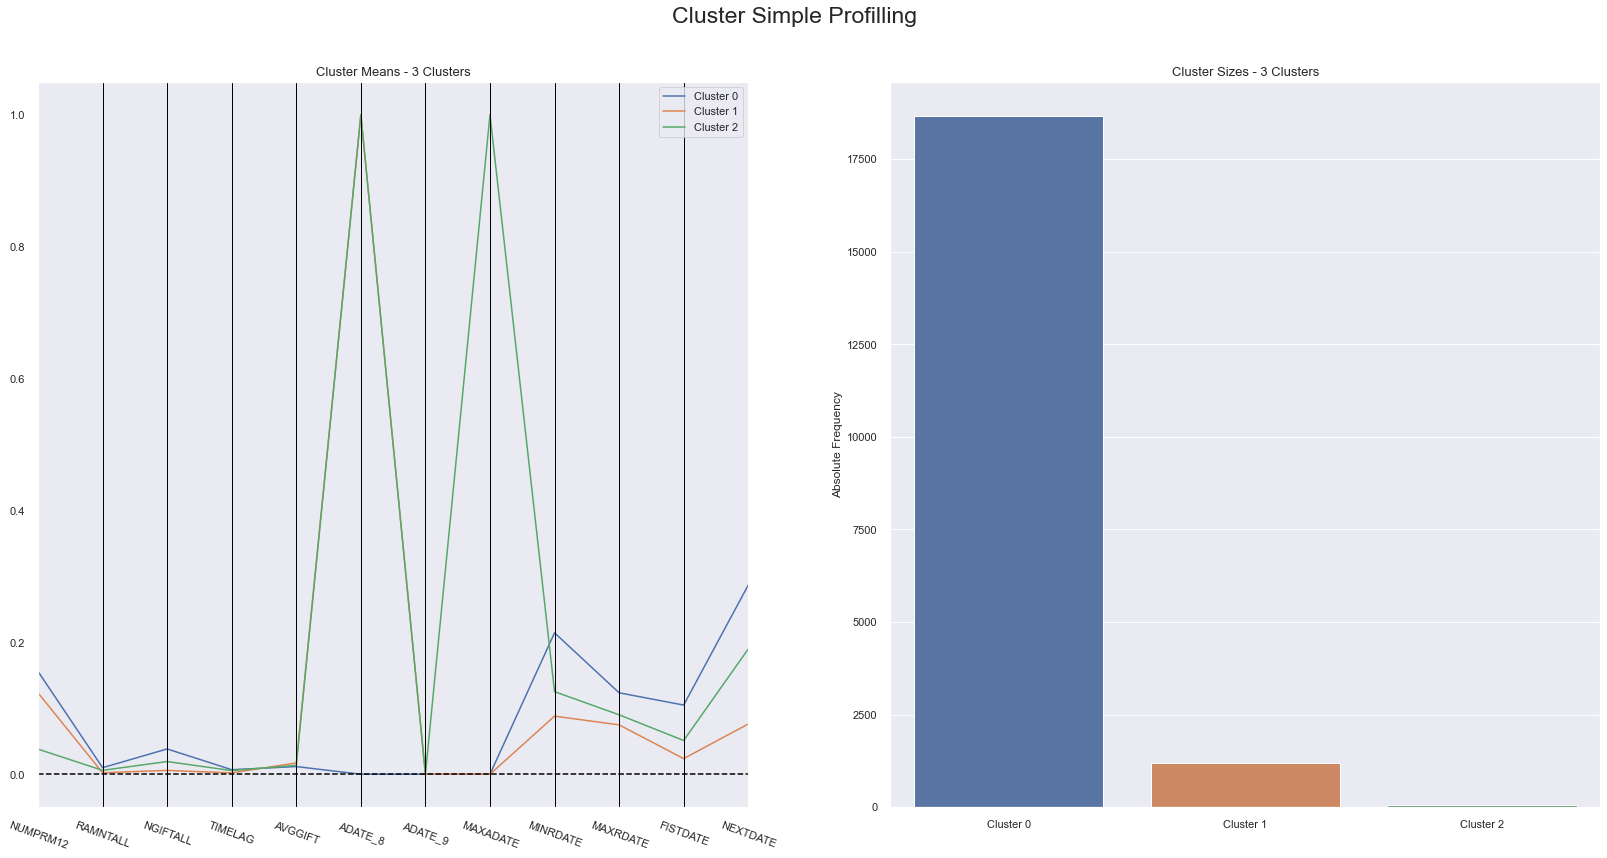

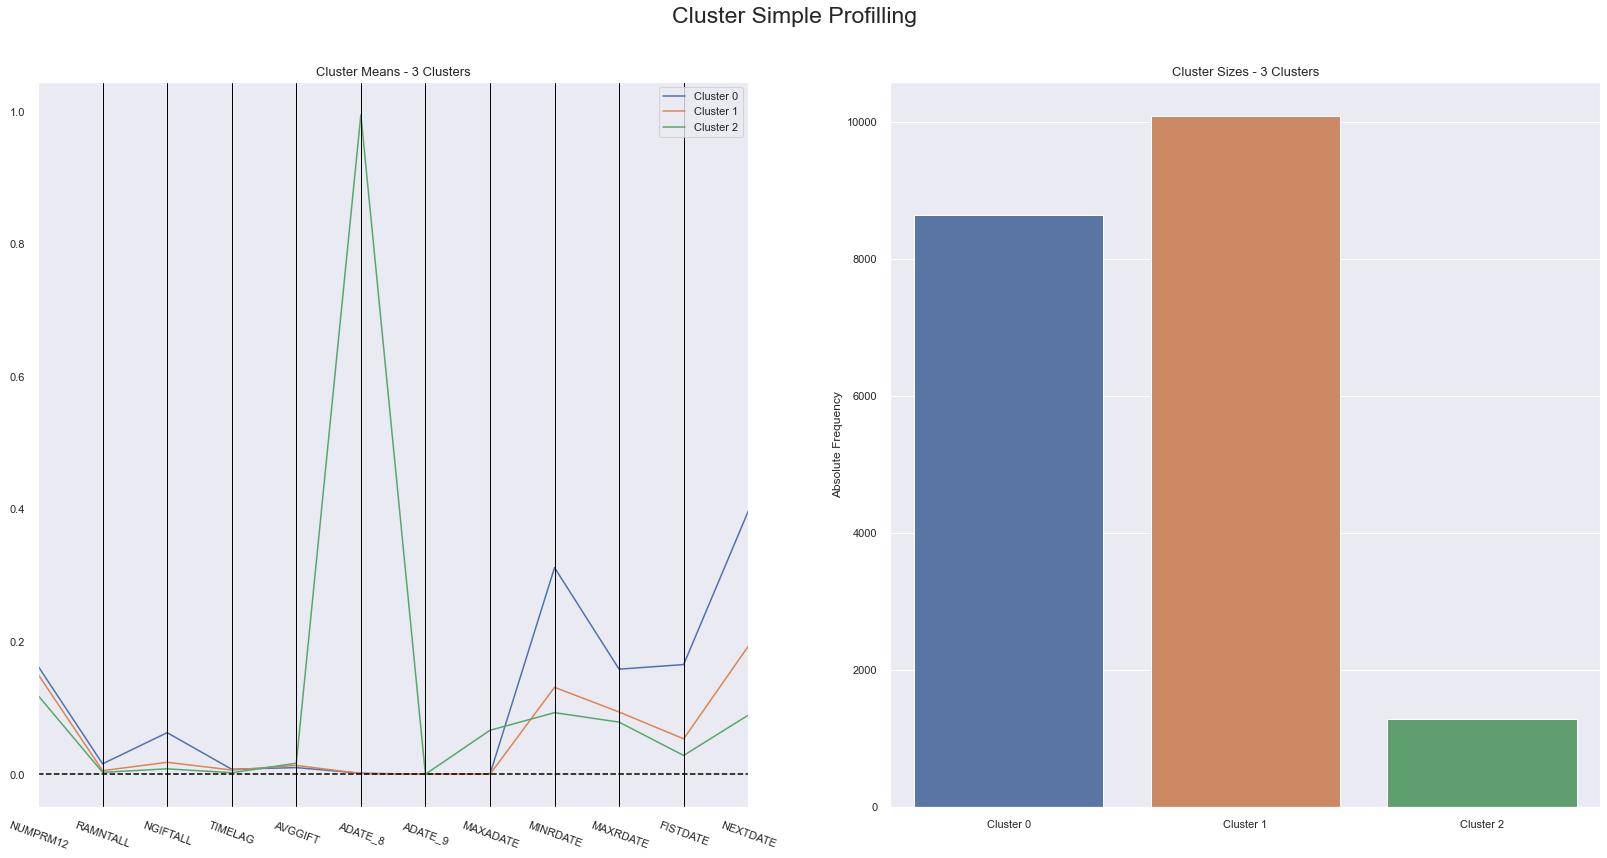

In [51]:
cluster_profiles(
    df = df_concat[new_d_metric + ['labels']], 
    label_columns = ['labels'], 
    figsize = (28, 13)
)


cluster_profiles(
    df = hc_concat[new_d_metric + ['labels']], 
    label_columns = ['labels'], 
    figsize = (28, 13)
)

cluster_profiles(
    df = df_concat[new_d_metric + ['gmm_labels']], 
    label_columns = ['gmm_labels'], 
    figsize = (28, 13)
)

cluster_profiles(
    df = df_nonoise[new_d_metric + ['dbscan_labels']], 
    label_columns = ['dbscan_labels'], 
    figsize = (28, 13)
)

cluster_profiles(
    df = df_final[new_d_metric + ['label']], 
    label_columns = ['label'], 
    figsize = (28, 13)
)

## Info (K-Means, HC, GMM, DBScan)

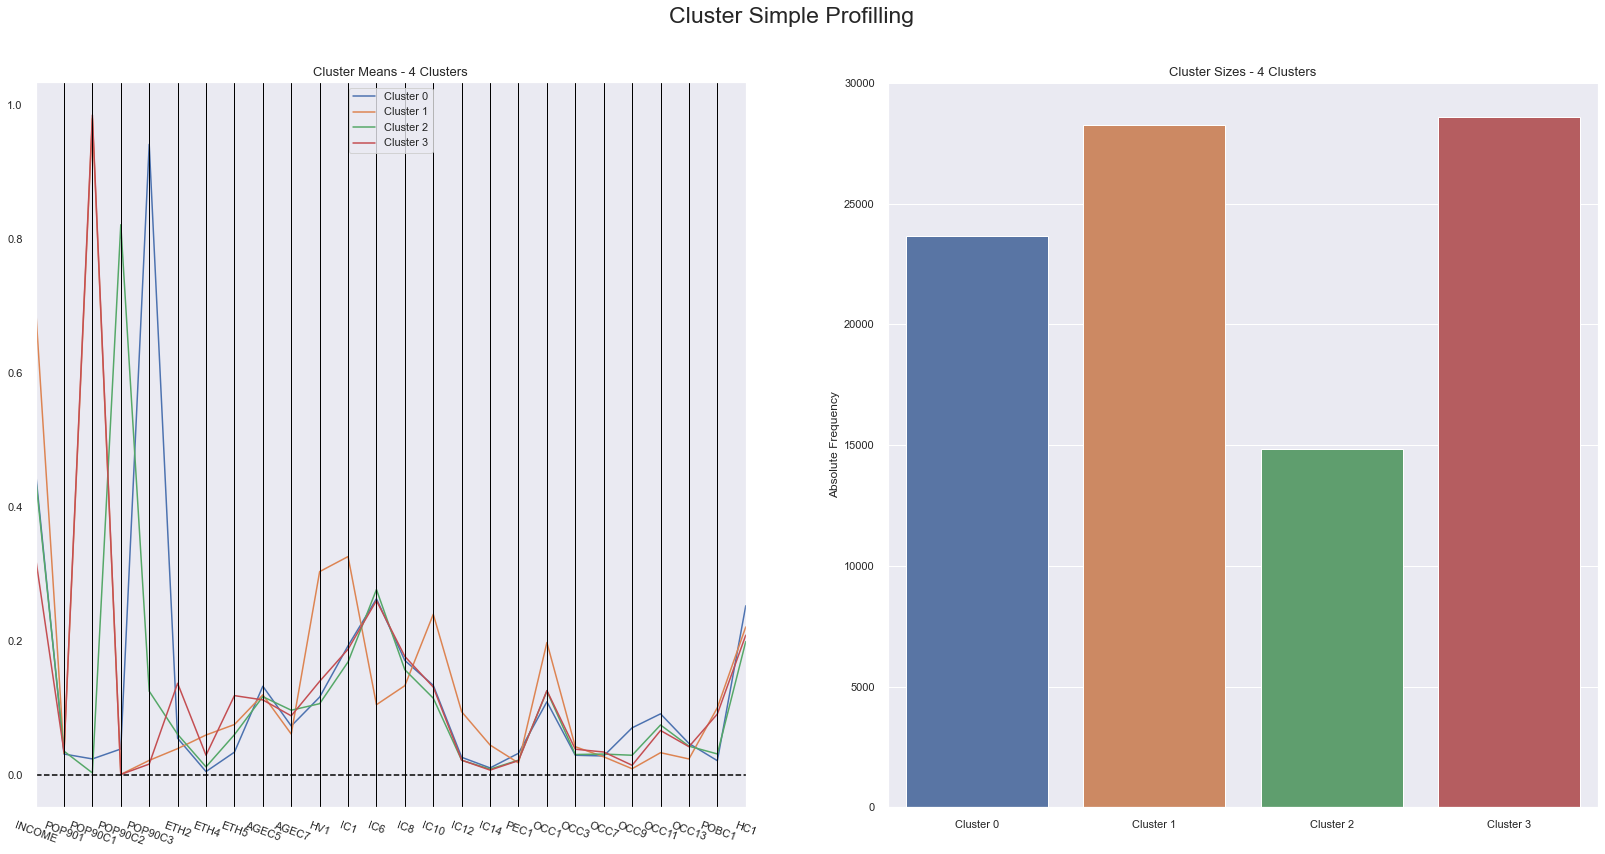

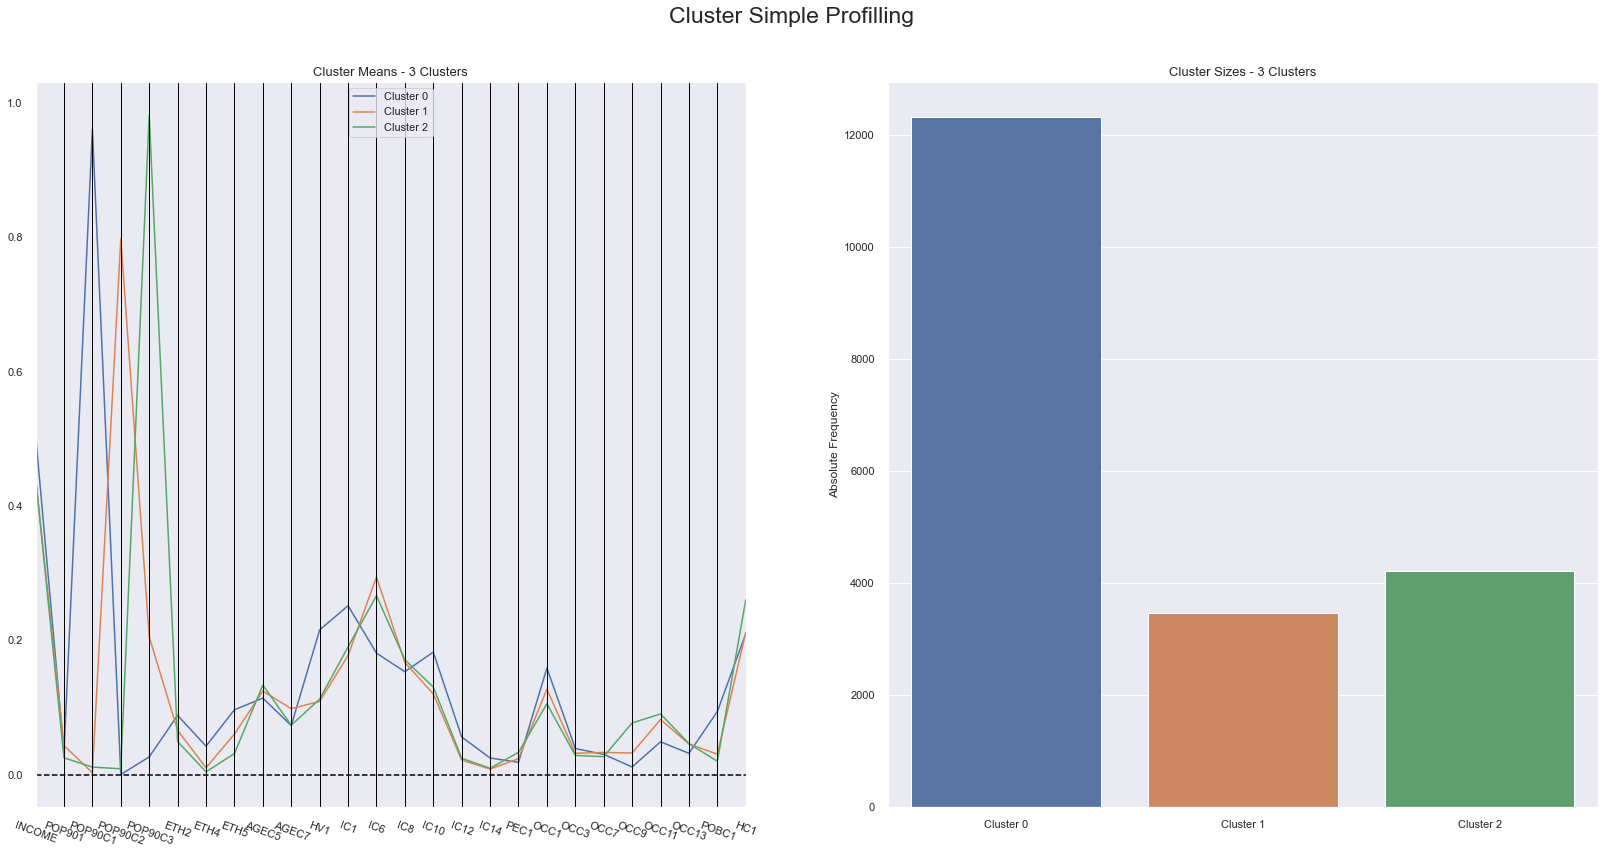

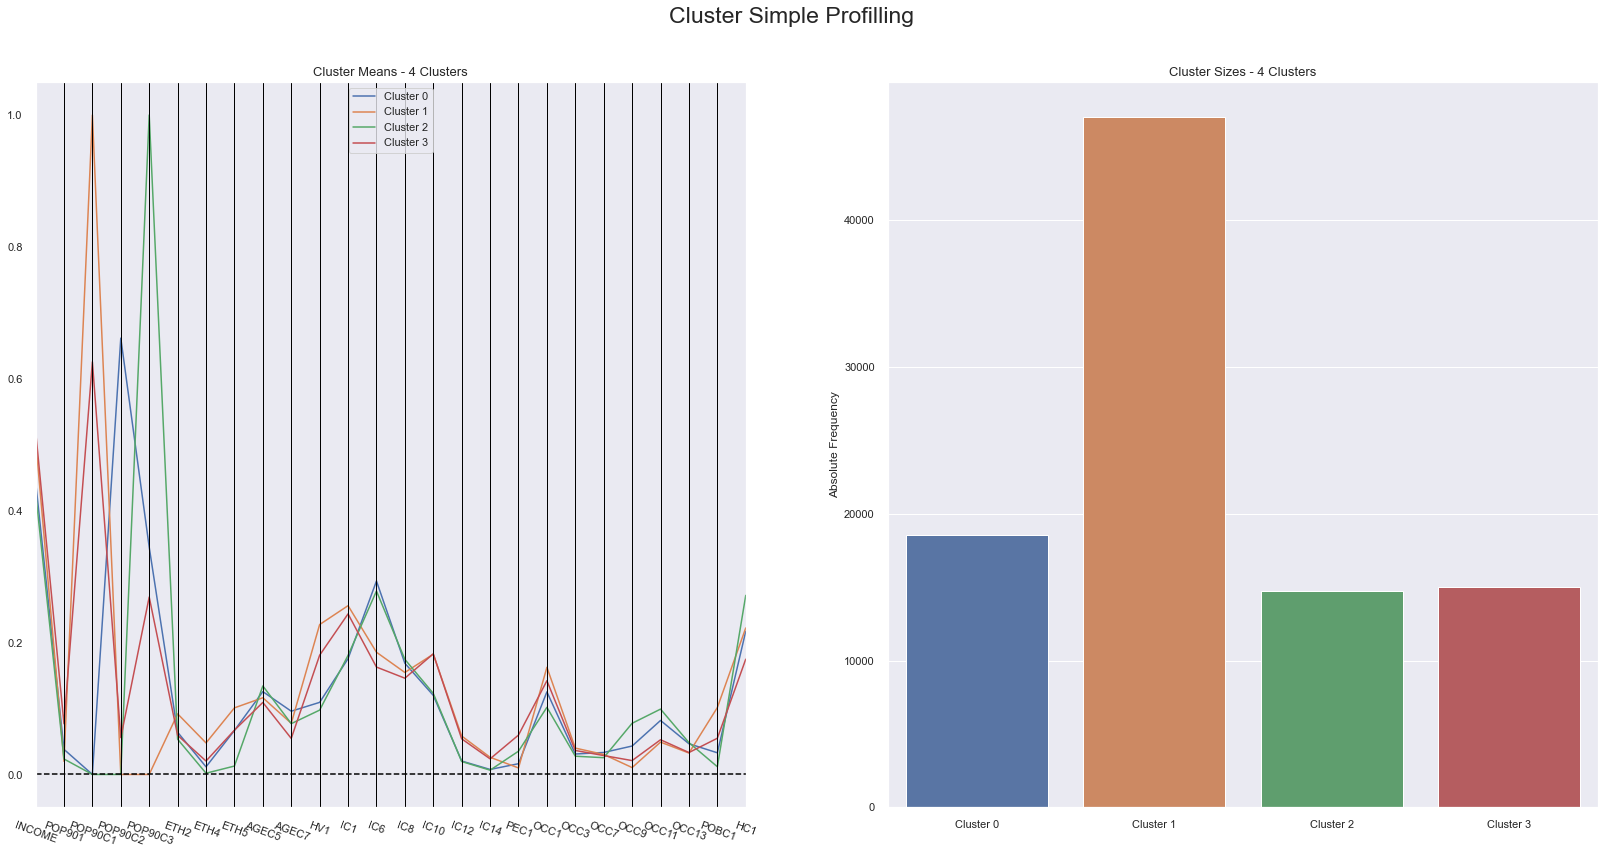

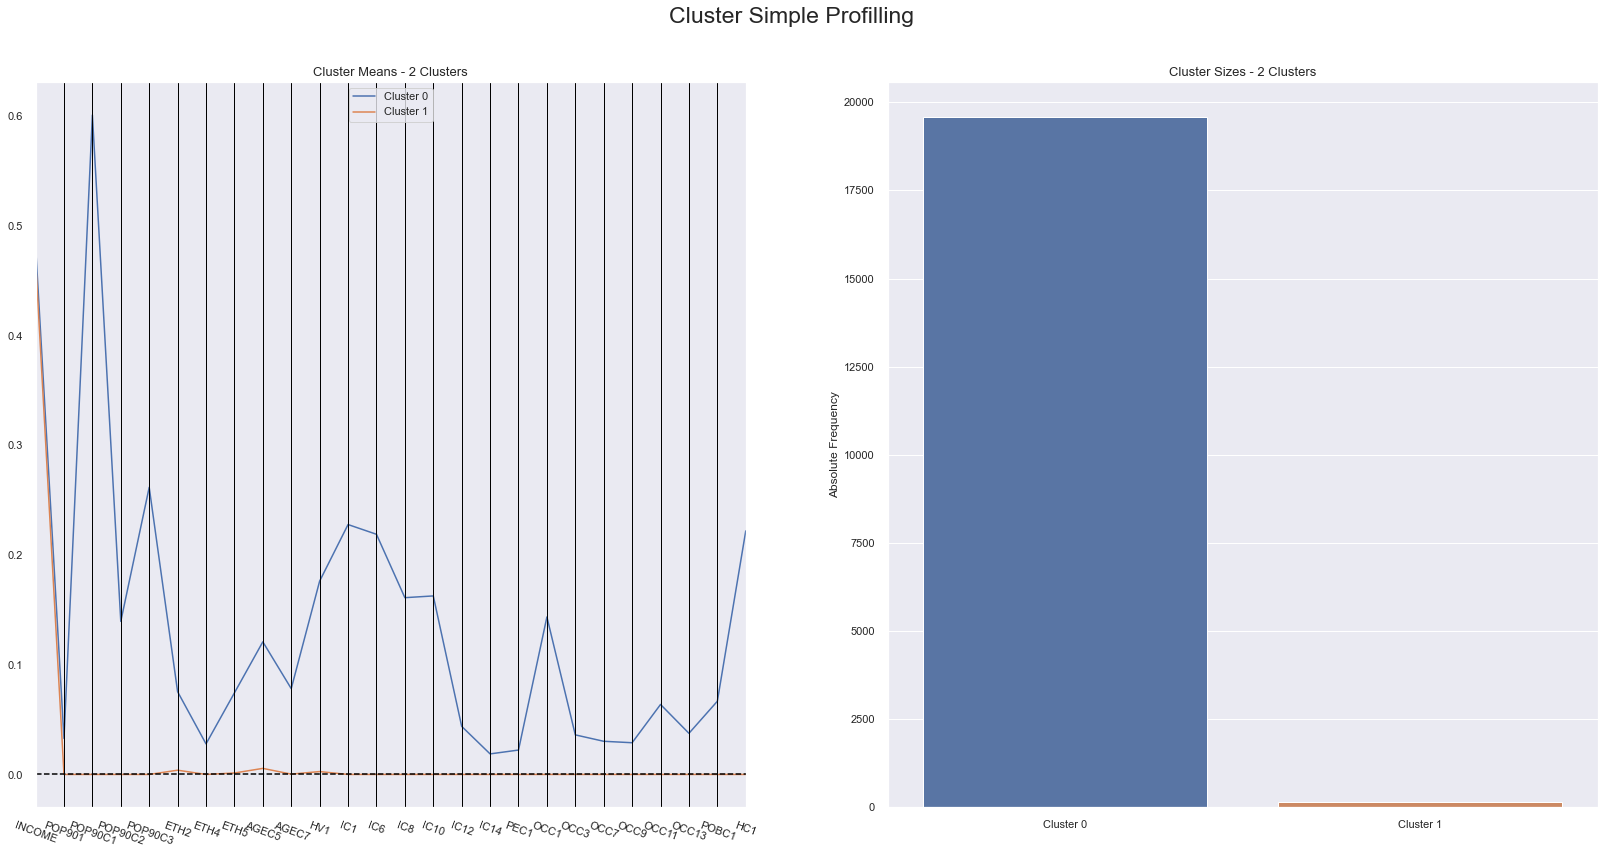

In [52]:
cluster_profiles(
    df = df_concat2[new_i_metric + ['labels']], 
    label_columns = ['labels'], 
    figsize = (28, 13)
)


cluster_profiles(
    df = hci_concat[new_i_metric + ['labels']], 
    label_columns = ['labels'], 
    figsize = (28, 13)
)

cluster_profiles(
    df = df_concat2[new_i_metric + ['gmm_labels']], 
    label_columns = ['gmm_labels'], 
    figsize = (28, 13)
)

cluster_profiles(
    df = dfi_nonoise[new_i_metric + ['dbscan_labels']], 
    label_columns = ['dbscan_labels'], 
    figsize = (28, 13)
)

## Cluster Merging

In [18]:
k_donors = KMeans(n_clusters=3, init='k-means++', n_init=20, random_state=1)
donors_labels = k_donors.fit_predict(donors[new_d_metric])


k_info = KMeans(n_clusters=4, init='k-means++', n_init=20, random_state=1)
info_labels = k_info.fit_predict(info[new_i_metric])

data['donors_labels'] = donors_labels
data['info_labels']= info_labels

data.groupby(['donors_labels', 'info_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('info_labels', 'donors_labels', 0)

donors_labels      0     1      2
info_labels                      
0              10799  1469  11410
1              11317  2002  14960
2               6942   910   6995
3              12489  2030  14089

In [19]:
df_centroids = data.groupby(['info_labels', 'donors_labels'])\
    [data_metric].mean()
df_centroids

NUMPRM12  RAMNTALL  NGIFTALL   TIMELAG   AVGGIFT  \
info_labels donors_labels                                                     
0           0              0.159765  0.014917  0.062150  0.007719  0.009671   
            1              0.118881  0.002904  0.008518  0.002530  0.016511   
            2              0.150101  0.005231  0.018973  0.006291  0.012469   
1           0              0.165116  0.016433  0.056861  0.007985  0.011489   
            1              0.119887  0.003005  0.007653  0.002541  0.017557   
            2              0.151018  0.005531  0.017126  0.006471  0.014151   
2           0              0.162570  0.015449  0.063716  0.007545  0.009676   
            1              0.120651  0.002533  0.008232  0.002228  0.016920   
            2              0.150852  0.005286  0.019211  0.006363  0.012449   
3           0              0.163515  0.015495  0.063429  0.007541  0.009797   
            1              0.120031  0.002793  0.008648  0.002493  0.016283   
            2              0.151346  0.005402  0.019065  0.006127  0.012739   

                           ADATE_8  ADATE_9  MAXADATE  MINRDATE  MAXRDATE  \
info_labels donors_labels                                                   
0           0                  0.0      0.0  0.000741  0.313678  0.157296   
            1                  1.0      0.0  0.055140  0.096015  0.082183   
            2                  0.0      0.0  0.000000  0.130316  0.092845   
1           0                  0.0      0.0  0.000707  0.310438  0.156538   
            1                  1.0      0.0  0.057942  0.096563  0.079534   
            2                  0.0      0.0  0.000334  0.129454  0.093191   
2           0                  0.0      0.0  0.000432  0.312904  0.158809   
            1                  1.0      0.0  0.043956  0.092857  0.079021   
            2                  0.0      0.0  0.000286  0.128364  0.094048   
3           0                  0.0      0.0  0.000721  0.309196  0.158398   
            1                  1.0      0.0  0.057143  0.094738  0.079333   
            2                  0.0      0.0  0.000142  0.128488  0.093771   

                           ...      IC14      PEC1      OCC1      OCC3  \
info_labels donors_labels  ...                                           
0           0              ...  0.009489  0.033181  0.108352  0.028388   
            1              ...  0.013065  0.031334  0.112308  0.030241   
            2              ...  0.010561  0.031076  0.109048  0.029651   
1           0              ...  0.044196  0.017548  0.198499  0.041325   
            1              ...  0.048214  0.018436  0.202394  0.042715   
            2              ...  0.043953  0.017534  0.195877  0.042141   
2           0              ...  0.007854  0.021666  0.128225  0.030582   
            1              ...  0.010190  0.021856  0.120424  0.029848   
            2              ...  0.008768  0.021864  0.122271  0.029951   
3           0              ...  0.007179  0.021807  0.127871  0.038185   
            1              ...  0.007061  0.019247  0.125949  0.038787   
            2              ...  0.006716  0.020867  0.123645  0.037987   

                               OCC7      OCC9     OCC11     OCC13     POBC1  \
info_labels donors_labels                                                     
0           0              0.027085  0.074436  0.091371  0.047063  0.020230   
            1              0.028702  0.060132  0.086632  0.045252  0.021089   
            2              0.028900  0.067235  0.091080  0.046599  0.021792   
1           0              0.026743  0.009165  0.032969  0.023581  0.096418   
            1              0.027091  0.008512  0.030888  0.022710  0.094582   
            2              0.026811  0.008991  0.033237  0.023744  0.103627   
2           0              0.030866  0.029084  0.076786  0.043009  0.028803   
            1              0.030549  0.029848  0.071662  0.042191  0.033034   
            2 

In [20]:
hc = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hc_labels = hc.fit_predict(df_centroids)

In [21]:
df_centroids.index

MultiIndex([(0, 0),
            (0, 1),
            (0, 2),
            (1, 0),
            (1, 1),
            (1, 2),
            (2, 0),
            (2, 1),
            (2, 2),
            (3, 0),
            (3, 1),
            (3, 2)],
           names=['info_labels', 'donors_labels'])

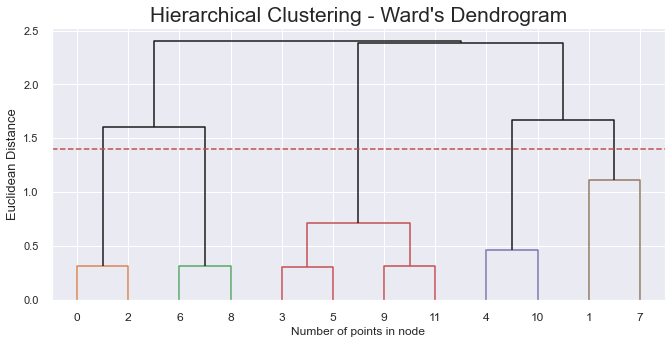

In [57]:
counts = np.zeros(hc.children_.shape[0])
n_samples = len(hc.labels_)


for i, merge in enumerate(hc.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count


linkage_matrix = np.column_stack(
    [hc.children_, hc.distances_, counts]
).astype(float)


sns.set()
fig = plt.figure(figsize=(11,5))

y_threshold = 1.4
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [22]:
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=5
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids

NUMPRM12  RAMNTALL  NGIFTALL   TIMELAG   AVGGIFT  \
info_labels donors_labels                                                     
0           0              0.159765  0.014917  0.062150  0.007719  0.009671   
            1              0.118881  0.002904  0.008518  0.002530  0.016511   
            2              0.150101  0.005231  0.018973  0.006291  0.012469   
1           0              0.165116  0.016433  0.056861  0.007985  0.011489   
            1              0.119887  0.003005  0.007653  0.002541  0.017557   
            2              0.151018  0.005531  0.017126  0.006471  0.014151   
2           0              0.162570  0.015449  0.063716  0.007545  0.009676   
            1              0.120651  0.002533  0.008232  0.002228  0.016920   
            2              0.150852  0.005286  0.019211  0.006363  0.012449   
3           0              0.163515  0.015495  0.063429  0.007541  0.009797   
            1              0.120031  0.002793  0.008648  0.002493  0.016283   
            2              0.151346  0.005402  0.019065  0.006127  0.012739   

                           ADATE_8  ADATE_9  MAXADATE  MINRDATE  MAXRDATE  \
info_labels donors_labels                                                   
0           0                  0.0      0.0  0.000741  0.313678  0.157296   
            1                  1.0      0.0  0.055140  0.096015  0.082183   
            2                  0.0      0.0  0.000000  0.130316  0.092845   
1           0                  0.0      0.0  0.000707  0.310438  0.156538   
            1                  1.0      0.0  0.057942  0.096563  0.079534   
            2                  0.0      0.0  0.000334  0.129454  0.093191   
2           0                  0.0      0.0  0.000432  0.312904  0.158809   
            1                  1.0      0.0  0.043956  0.092857  0.079021   
            2                  0.0      0.0  0.000286  0.128364  0.094048   
3           0                  0.0      0.0  0.000721  0.309196  0.158398   
            1                  1.0      0.0  0.057143  0.094738  0.079333   
            2                  0.0      0.0  0.000142  0.128488  0.093771   

                           ...      PEC1      OCC1      OCC3      OCC7  \
info_labels donors_labels  ...                                           
0           0              ...  0.033181  0.108352  0.028388  0.027085   
            1              ...  0.031334  0.112308  0.030241  0.028702   
            2              ...  0.031076  0.109048  0.029651  0.028900   
1           0              ...  0.017548  0.198499  0.041325  0.026743   
            1              ...  0.018436  0.202394  0.042715  0.027091   
            2              ...  0.017534  0.195877  0.042141  0.026811   
2           0              ...  0.021666  0.128225  0.030582  0.030866   
            1              ...  0.021856  0.120424  0.029848  0.030549   
            2              ...  0.021864  0.122271  0.029951  0.030986   
3           0              ...  0.021807  0.127871  0.038185  0.034135   
            1              ...  0.019247  0.125949  0.038787  0.034277   
            2              ...  0.020867  0.123645  0.037987  0.033792   

                               OCC9     OCC11     OCC13     POBC1       HC1  \
info_labels donors_labels                                                     
0           0              0.074436  0.091371  0.047063  0.020230  0.260377   
            1              0.060132  0.086632  0.045252  0.021089  0.235886   
            2              0.067235  0.091080  0.046599  0.021792  0.246569   
1           0              0.009165  0.032969  0.023581  0.096418  0.230242   
            1              0.008512  0.030888  0.022710  0.094582  0.202443   
            2              0.008991  0.033237  0.023744  0.103627  0.215741   
2           0              0.029084  0.076786  0.043009  0.028803  0.206443   
            1              0.029848  0.071662  0.042191  0.033034  0.185112   
            2 

In [23]:
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = data.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['info_labels'], row['donors_labels'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels').mean()[data_metric]

NUMPRM12  RAMNTALL  NGIFTALL   TIMELAG   AVGGIFT  ADATE_8  \
merged_labels                                                              
0              0.119558  0.002762  0.008409  0.002415  0.016667      1.0   
1              0.119959  0.002899  0.008154  0.002517  0.016916      1.0   
2              0.157077  0.010185  0.037092  0.006956  0.012175      0.0   
3              0.156688  0.010348  0.041379  0.006952  0.011068      0.0   
4              0.154800  0.009941  0.039968  0.006985  0.011108      0.0   

               ADATE_9  MAXADATE  MINRDATE  MAXRDATE  ...      IC14      PEC1  \
merged_labels                                         ...                       
0                  0.0  0.050862  0.094807  0.080974  ...  0.011965  0.027709   
1                  0.0  0.057540  0.095644  0.079433  ...  0.027495  0.018844   
2                  0.0  0.000454  0.210419  0.122317  ...  0.025390  0.019435   
3                  0.0  0.000359  0.220283  0.126305  ...  0.008313  0.021765   
4                  0.0  0.000360  0.219475  0.124184  ...  0.010040  0.032100   

                   OCC1      OCC3      OCC7      OCC9     OCC11     OCC13  \
merged_labels                                                               
0              0.115412  0.030091  0.029409  0.048548  0.080906  0.044081   
1              0.163906  0.040737  0.030709  0.011935  0.047449  0.032152   
2              0.161115  0.039924  0.030388  0.011594  0.049807  0.032853   
3              0.125237  0.030265  0.030926  0.029086  0.074498  0.042718   
4              0.108709  0.029037  0.028017  0.070737  0.091222  0.046825   

                  POBC1       HC1  
merged_labels                      
0              0.025658  0.216464  
1              0.092392  0.197453  
2              0.095599  0.215711  
3              0.030949  0.199576  
4              0.021033  0.253283  

[5 rows x 38 columns]

In [24]:
df_counts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

# Getting the product and behavior labels
df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts['info_labels'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['donors_labels'] = df_counts['merged_labels'].apply(lambda x: x[1])
df_counts.pivot('info_labels', 'donors_labels', 0)

donors_labels       1        2
info_labels                   
0                 NaN  22209.0
2              2379.0  13937.0
3              4032.0  52855.0

In [25]:
data=df_.copy()

<hr>
<a class="anchor" id="5.9.">
    
# 5.9.T-SNE 
    
</a>

In [62]:
newsne= TSNE(random_state=42).fit_transform(data[data_metric])

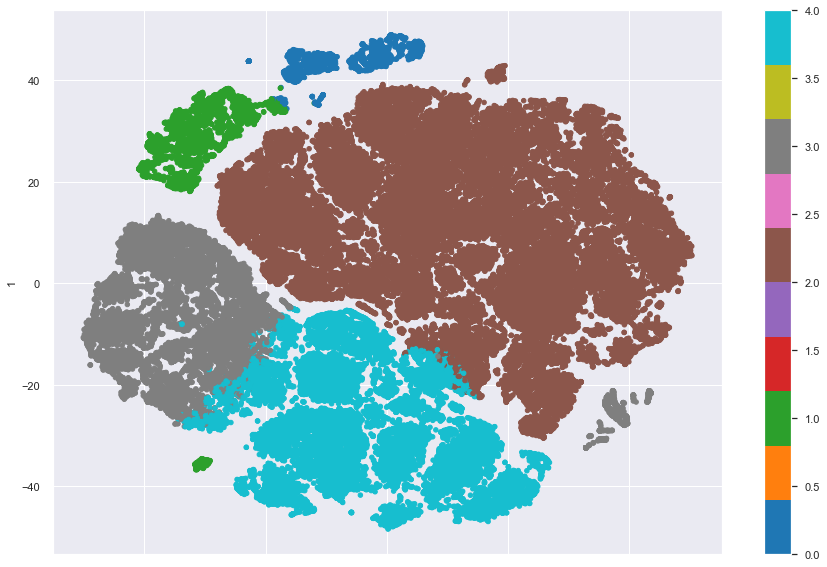

In [63]:
pd.DataFrame(newsne).plot.scatter(x=0, y=1, c=data['merged_labels'], colormap='tab10', figsize=(15,10))
plt.show()

<hr>
<a class="anchor" id="5.10.">
    
# 5.10. Cluster Interpretation
    
</a>

In [26]:
data.groupby('merged_labels').mean()

HIT     SOLP3      SOLIH  ADATE_2  ADATE_3   ADATE_4  \
merged_labels                                                              
0              0.006940  9.990752   9.998319      0.0      0.0  0.000420   
1              0.010188  9.990079  10.029018      0.0      0.0  0.001240   
2              0.015931  9.991392  10.076492      0.0      0.0  0.000019   
3              0.014141  9.987300  10.076128      0.0      0.0  0.000072   
4              0.009828  9.990815  10.067810      0.0      0.0  0.000045   

               ADATE_5  ADATE_6   ADATE_7  ADATE_8  ...      HC17      HC19  \
merged_labels                                       ...                       
0                  0.0      0.0  0.009248      1.0  ...  0.640100  0.442636   
1                  0.0      0.0  0.009177      1.0  ...  0.959253  0.895828   
2                  0.0      0.0  0.000719      0.0  ...  0.962640  0.907121   
3                  0.0      0.0  0.000861      0.0  ...  0.860213  0.767359   
4                  0.0      0.0  0.000495      0.0  ...  0.512232  0.271583   

                   HC20     MHUC1     MHUC2       AC1       AC2       Age  \
merged_labels                                                               
0              0.959108  0.345083  0.435897  0.061077  0.063162  0.653327   
1              0.998477  0.421840  0.493006  0.055761  0.056375  0.652458   
2              0.997871  0.418768  0.488877  0.056927  0.058292  0.676570   
3              0.940224  0.311972  0.410734  0.055718  0.060307  0.690962   
4              0.984816  0.353745  0.445891  0.065702  0.065985  0.670333   

               donors_labels  info_labels  
merged_labels                              
0                   1.000000     0.765027  
1                   1.000000     2.006944  
2                   1.099196     2.005695  
3                   1.003803     2.000000  
4                   1.027511     0.000000  

[5 rows x 270 columns]

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.
findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 

findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Brush Script MT' (BRUSHSCI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Baskerville Old Face' (BASKVILL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Garamond' (GARAIT.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Rockwell' (ROCKI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Calibri' (calibriz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal 290 normal>) = 10.1545
findfont: score(<Font 'Ravie' (RAVIE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (SCHLBKBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Times New Roman' (times.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Symbol' (symbol.ttf) normal normal 

findfont: score(<Font 'Yu Gothic' (YuGothB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Demi Cond' (FRADMCN.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_CR.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Palatino Linotype' (palab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 0.25
findfont: score(<Font 'Mongolian Baiti' (monbaiti.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Edwardian Script ITC' (ITCEDSCR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Ravie' (RAVIE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Drogolin' (DROGB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Yad-Light' (GYADXL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'I

findfont: score(<Font 'Gill Sans Ultra Bold Condensed' (GILLUBCD.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'TeamViewer11' (teamviewer11.otf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Rockwell Condensed' (ROCC____.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'OCR A Extended' (OCRAEXT.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tw Cen MT' (TCB_____.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Calisto MT' (CALISTI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gadugi' (gadugi.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft T

findfont: score(<Font 'Nirmala UI' (Nirmala.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaI.ttc) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Tahoma' (tahoma.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Papyrus' (PAPYRUS.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (CENSCBK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Edwardian Script ITC' (ITCEDSCR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Matura MT Script Capitals' (MATURASC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Palatino Linotype' (palab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Gill Sans MT Ext Condensed Bold' (GLSNECB.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 1.05
findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font '

findfont: score(<Font 'Calibri' (calibrib.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Showcard Gothic' (SHOWG.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Haim' (GHAIM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tw Cen MT' (TCMI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Consolas' (consolaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Palace Script MT' (PALSCRI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Kav' (GKAVBLD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Drogolin' (DROGB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bell MT' (BELLB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Sans' (LSANSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Guttman Haim' (GHAIM.TTF) normal norma

findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Harrington' (HARNGTON.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Garamond' (GARAIT.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Century Gothic' (GOTHICB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Wingdings 3' (WINGDNG3.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rage Italic' (RAGE.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Bodoni MT' (BOD_CB.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Guttman Rashi' (RASHIB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Kav' (GKAVMED.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeui.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 

findfont: score(<Font 'Imprint MT Shadow' (IMPRISHA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bell MT' (BELLI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Corbel' (corbelz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft YaHei' (msyhbd.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Vilna' (VILNA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Drogolin' (DROGM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gadugi' (gadugib.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Microsoft New Tai Lue' (ntailu.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Palatino Linotype' (palabi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Yu Gothic' (YuGothM.ttc) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Ebrima' (ebrimabd.tt

findfont: score(<Font 'Bradley Hand ITC' (BRADHITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candarai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Corbel' (corbell.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'MS Outlook' (OUTLOOK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 1.05
findfont: score(<Font 'Arial' (ariblk.ttf) normal normal 900 normal>) = 0.525
findfont: score(<Font 'Guttman Aharoni' (GAHROM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (seguisb.ttf) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Showcard Gothic' (SHOWG.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Vladimir Script' (VLADIMIR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Nirmala UI' (Nirmala.ttf) normal normal 400 normal>) =

findfont: score(<Font 'Century Gothic' (GOTHIC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Book Antiqua' (BKANT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Cambria' (cambriab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Elephant' (ELEPHNTI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe Print' (segoepr.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Goudy Old Style' (GOUDOSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Californian FB' (CALIFI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Perpetua' (PERB____.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MT Extra' (MTEXTRA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Perpetua Titling MT' (PERTIBD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Handwriting' (LHANDW.TTF) italic

findfont: score(<Font 'Harlow Solid Italic' (HARLOWSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEO.TTF) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Calisto MT' (CALISTB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe Script' (segoescb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman-Aharoni' (AHROB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Miryam' (MIRB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Calisto MT' (CALISTB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Franklin Gothic Medium Cond' (FRAMDCN.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Sitka Small' (SitkaI.ttc) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Hi

findfont: score(<Font 'Gill Sans MT Condensed' (GILC____.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Palatino Linotype' (palai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe Print' (segoeprb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe Print' (segoeprb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Myanmar Text' (mmrtext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Impact' (impact.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Eras Bold ITC' (ERASBD.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Malgun Gothic' (malgun.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Goudy Old Style' (GOUDOSB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft Tai Le' (ta

findfont: score(<Font 'Nirmala UI' (NirmalaS.ttf) normal normal 350 normal>) = 10.0975
findfont: score(<Font 'Segoe UI Emoji' (seguiemj.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaZ.ttc) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Palatino Linotype' (palai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Bodoni MT' (BOD_CR.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEBO.TTF) oblique normal 600 normal>) = 11.24
findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Niagara Engraved' (NIAGENG.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibriz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Cambria

findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'MingLiU-ExtB' (mingliub.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ARIALNI.TTF) italic normal 400 condensed>) = 1.25
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Times New Roman' (timesbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Candara' (Candara.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kristen ITC' (ITCKRIST.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Eras Light ITC' (ERASLGHT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MS Reference Sans Serif' (REFSAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Book' (FRABKIT.TTF) italic normal 400 normal>) = 11.05
findfont: score

findfont: score(<Font 'Bodoni MT' (BOD_BI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Sitka Small' (Sitka.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOSI.TTF) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'French Script MT' (FRSCRIPT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Goudy Old Style' (GOUDOSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Perpetua' (PERI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 0.25
findfont: score(<Font 'Nirmala UI' (NirmalaB.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Onyx' (ONYX.TTF) normal normal 400 norm

findfont: score(<Font 'Lucida Sans' (LSANSDI.TTF) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Franklin Gothic Medium' (framd.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bell MT' (BELLB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Felix Titling' (FELIXTI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_PSTC.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Palatino Linotype' (pala.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Frank' (GFRANK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Aharoni' (GAHROM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Book Antiqua' (ANTQUAB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Microsoft JhengHei' (msjhbd.

findfont: score(<Font 'OCR A Extended' (OCRAEXT.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Lucida Sans Unicode' (l_10646.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Elephant' (ELEPHNT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Blackadder ITC' (ITCBLKAD.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeui.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gloucester MT Extra Condensed' (GLECB.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Century Gothic' (GOTHIC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial Unicode MS' (ARIALUNI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Corbel' (corbelli.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Felix Titling' (FELIXTI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Dubai' (DUBAI-MEDIUM.TTF) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Maian

findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Century Schoolbook' (SCHLBKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Agency FB' (AGENCYB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Frank' (FRANKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Fax' (LFAXI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'MV Boli' (mvboli.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Gothic' (GOTHICB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Microsoft JhengHei' (msjh.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tahoma' (tahomabd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Rashi' (RASHIB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe UI' (seguibl.ttf) norm

findfont: score(<Font 'Lucida Handwriting' (LHANDW.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Consolas' (consola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Haim-Condensed' (GHAIMC.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Corbel' (corbeli.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'MS Reference Specialty' (REFSPCL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Playbill' (PLAYBILL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Fax' (LFAXD.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Magneto' (MAGNETOB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Wingdings 3' (WINGDNG3.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MS Reference Specialty' (REFSPCL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ARIALNB.TTF) normal normal 700 condensed>) = 0.5349999999999999
findfont: score(<Font 'Calis

findfont: score(<Font 'Franklin Gothic Medium' (framd.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft Yi Baiti' (msyi.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Demi' (FRADM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Bright' (LBRITE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft PhagsPa' (phagspab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHVIT.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Tw Cen MT Condensed' (TCCB____.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Yu Gothic' (YuGothM.ttc) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Myanmar Text' (mmrtext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
findfont: 

findfont: score(<Font 'Bodoni MT' (BOD_BLAI.TTF) italic normal 900 normal>) = 11.525
findfont: score(<Font 'Matura MT Script Capitals' (MATURASC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gill Sans MT' (GILI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Bodoni MT' (BOD_R.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Viner Hand ITC' (VINERITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Impact' (impact.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Malgun Gothic' (malgunsl.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Baskerville Old Face' (BASKVILL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans Type

findfont: score(<Font 'Tw Cen MT' (TCMI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHVIT.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Kievit Offc Pro' (KievitOffcPro.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Logo1' (LOGO1.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe UI' (seguibli.ttf) italic normal 900 normal>) = 11.525
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Californian FB' (CALIFR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibrili.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Tw Cen MT' (TCBI____.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Guttman Mantova'

findfont: score(<Font 'Gigi' (GIGI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Monotype Corsiva' (MTCORSVA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Cambria' (cambria.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Wingdings 2' (WINGDNG2.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Engravers MT' (ENGR.TTF) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal 350 normal>) = 10.0975
findfont: score(<Font 'Lucida Bright' (LBRITEI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Magneto' (MAGNETOB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Poor Richard' (POORICH.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Javanese Text' (javatext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal

findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Palatino Linotype' (pala.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Elephant' (ELEPHNTI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman-Aram' (ARAM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'MingLiU-ExtB' (mingliub.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Miryam' (MIRB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Eras Light ITC' (ERASLGHT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'HoloLens MDL2 Assets' (holomdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Book Antiqua' (ANTQUAB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Rockwell Condensed' (ROCCB___.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Bookman Old Style'

findfont: score(<Font 'Bookman Old Style' (BOOKOSBI.TTF) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Palace Script MT' (PALSCRI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Nirmala UI' (NirmalaB.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Arial' (arial.ttf) normal normal 400 normal>) = 0.05
findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Guttman Stam1' (STAM1.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Yu Gothic' (YuGothB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Playbill' (PLAYBILL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (trebucbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Medium' (framdit.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Corbel' (c

findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 2.335
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal 400 norma

findfont: score(<Font 'Microsoft JhengHei' (msjhbd.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bodoni MT' (BOD_B.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Corbel' (corbelb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Perpetua' (PER_____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tw Cen MT' (TCM_____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Rashi' (RASHI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_PSTC.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Lucida Calligraphy' (LCALLIG.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Arial' (ARIALNBI.TTF) italic normal 700 condensed>) = 1.535
findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Poor Richard' (POORICH.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) norma

findfont: score(<Font 'Rockwell' (ROCKBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Century Schoolbook' (SCHLBKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Californian FB' (CALIFI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Century Gothic' (GOTHICI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Copperplate Gothic Light' (COPRGTL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Mantova' (MANTM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Tw Cen MT' (TCM_____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Fax' (LFAXD.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Vivaldi' (VIVALDII.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Javanese Text' (ja

findfont: score(<Font 'Franklin Gothic Demi' (FRADMIT.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Bodoni MT' (BOD_B.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bodoni MT' (BOD_CI.TTF) italic normal 400 condensed>) = 11.25
findfont: score(<Font 'Segoe UI' (seguibli.ttf) italic normal 900 normal>) = 11.525
findfont: score(<Font 'Old English Text MT' (OLDENGL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Pristina' (PRISTINA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ARIALNBI.TTF) italic normal 700 condensed>) = 1.535
findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Cambria' (cambriab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Rockwell' (ROCK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Yad' (GYADL.TTF) normal normal 4

findfont: score(<Font 'Times New Roman' (timesbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Perpetua' (PERBI___.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Monotype Hadassah' (HDAS.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Book Antiqua' (ANTQUABI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Arial' (arialbi.ttf) italic normal 700 normal>) = 1.335
findfont: score(<Font 'Dubai' (DUBAI-BOLD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Courier New' (courbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'SimSun-ExtB' (simsunb.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Vilna' (VILNAB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Book Antiqua' (BKANT.TTF) normal normal 400 no

findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bookman Old Style' (BOOKOSI.TTF) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tw Cen MT' (TCBI____.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Bodoni MT' (BOD_CBI.TTF) italic normal 700 condensed>) = 11.535
findfont: score(<Font 'Garamond' (GARA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Bright' (LBRITEDI.TTF) italic normal 600 normal>) = 11.24
findfont: score(<Font 'MS Gothic' (msgothic.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (seguisb.ttf) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Microsoft New Tai Lue' (ntailu.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Monotype Hadassah' (HDASBD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Bright' (LBRITEI.

findfont: score(<Font 'Imprint MT Shadow' (IMPRISHA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft PhagsPa' (phagspa.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Franklin Gothic Book' (FRABKIT.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Garamond' (GARA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_CBI.TTF) italic normal 700 condensed>) = 11.535
findfont: score(<Font 'Rockwell' (ROCKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Courier New' (cour.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Wingdings' (wingding.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Mistral' (MISTRAL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Copperplate Gothic Light' (COPRGTL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_BLAI.

findfont: score(<Font 'Microsoft Yi Baiti' (msyi.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century' (CENTURY.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Georgia' (georgiab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Candara' (Candaral.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Vladimir Script' (VLADIMIR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal 290 normal>) = 10.1545
findfont: score(<Font 'Calibri' (calibril.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Leelawadee UI' (LeelaUIb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bauhaus 93' (BAUHS93.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeuiz.ttf) italic norma

findfont: score(<Font 'Century' (CENTURY.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (arialbd.ttf) normal normal 700 normal>) = 0.33499999999999996
findfont: score(<Font 'Gigi' (GIGI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Constantia' (constanz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Rockwell' (ROCKBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Book' (FRABK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tempus Sans ITC' (TEMPSITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Constantia' (constani.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Courier New' (cour.ttf) normal no

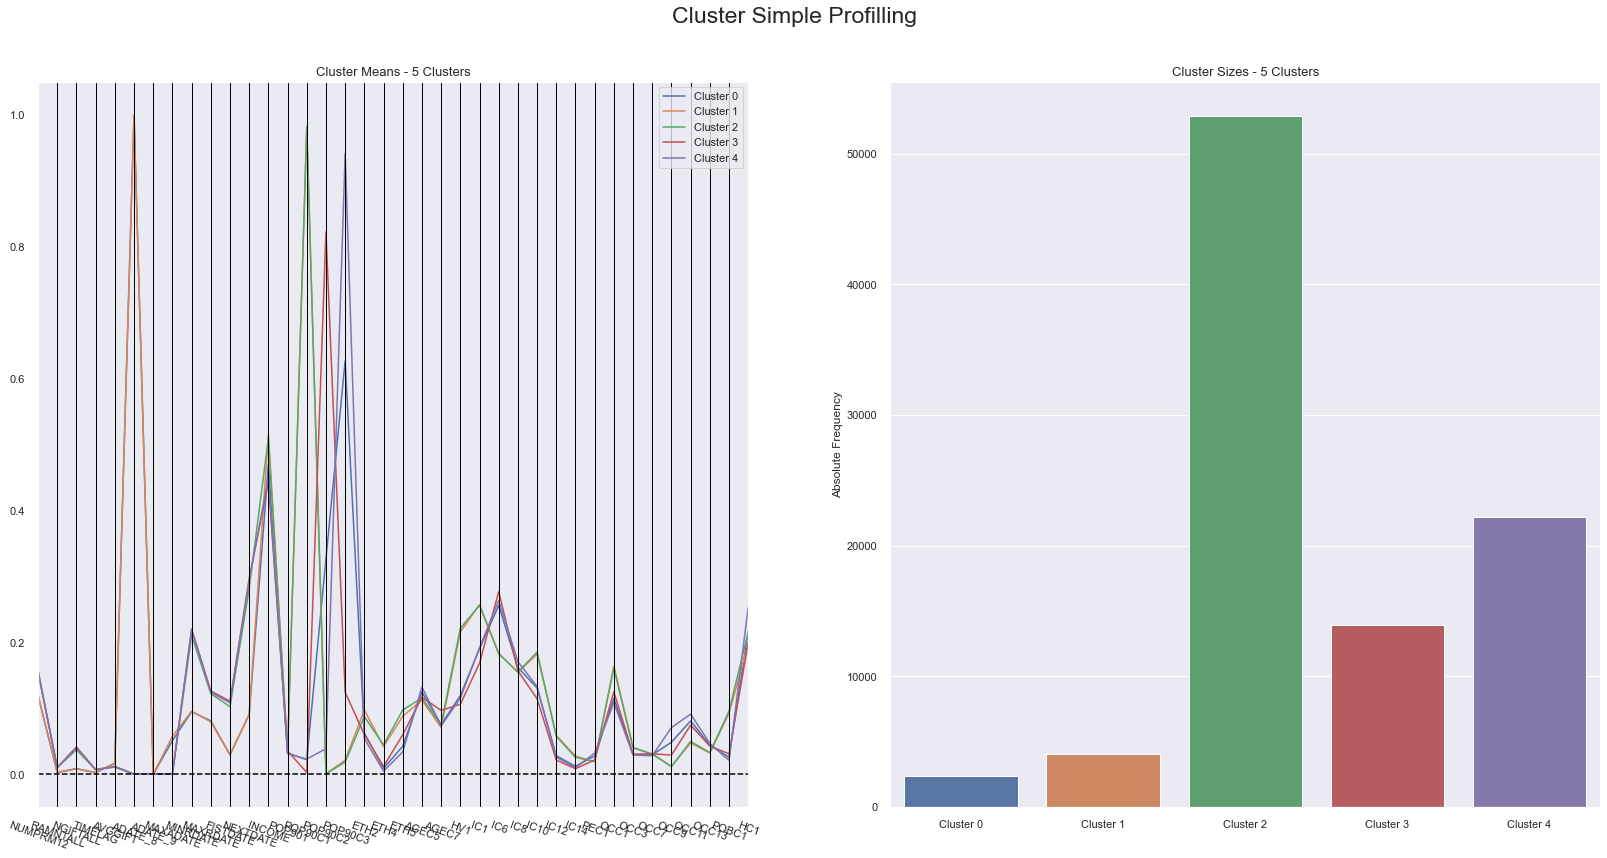

In [27]:
cluster_profiles(
    df = data[data_metric + ['merged_labels']], 
    label_columns = ['merged_labels'], 
    figsize = (28, 13)
)

What distinguishes the clusters:
- Orange has a clear high ADATE_8 and smaller MINRDATE and smaller MAXRDATE, smaller FISTDATE
- Green has a high POP90C1.
- Red has a high POP90C2
- Purple has a high POP90C3, Blue is also relatively high here.
- Green and orange have both higher HV1 and IC1 than the others. The others have a higher IC6 and Gr and Or have it lower.
- Gr and Or have a higher ETH4. 
- There is a specific pattern here where green and orange mostly go together on most variables of the new_i_metric, and the others go together. 

What does this mean? What's the proportion of categorical variables in each cluster?

**Cluster 1**- ADATE_8 defines how long ago the promotion 96GK was mailed. There are currently 89K donors who were mailed the promotion 4 years ago, which, after normalizing is defined as 0, and 6411 donors who were mailed the promotion 5 years ago. This is a big distinction for cluster 1, but this characteristic itself seems partially conceptually irrelevant. The interesting part is that cluster 1 also seems to have lower average MINRDATE, MAXRDATE and FISTDATE. This implies that this cluster of donors has donated their lowest value gift, highest value gift and overall first donation more recently than the others, despite having being mailed the promotion 96GK longer ago. In TIMELAG, we can see that Cluster 1 has lower values, meaning that the period between the first and second donation was smaller than average.

**Cluster 2** is by far the largest, with more than 50 thousand donors. It is distinguished by a high POP90C1, meaning urban residents, given that these donors live in neighboorhoods with a high percentage of the citizens in highly urbanized environments- this allows for a very relevant analysis. 

**Cluster 3** is defined by a high POP90C2, which means that these individuals live in neighborhoods outside urban regions. These can be seen as areas with less population density, away from the main larger cities and suburbs. One important variable here is AGEC7, where this cluster shows superior values to all other clusters, meaning higher number of senior citizens. 

**Cluster 4** is defined by a high POP90C3, meaning donors that live in neighborhoods in rural areas. These outweigh the number of individuals living outside urban areas (cluster 3), but are still definitively smaller than the number of individuals in urban environments (cluster 2). It is also important to note that cluster 0, the smallest, has a high percentage of individuals living in rural areas, so both cluster 4 and 0 can be geographically located in such regions. 
This preliminary analysis concludes that geographical location is a big cluster determinant, not only obviously due to the geographical differences (someone living in a place cannot simultaneously live in another), but the mere fact that different clusters refer to different locations might suggest that these differences also lead to divergent behavioral patterns, which is what will be examined now.

**Clusters 1|2 vs. Clusters 0|3|4** One pattern that can be seen is that, in most variables regarding individual information, cluster 2 and 1 go usually together, while the remaining 0, 3 and 4 tend to behave similarly. The next significant divergence in behavior is in ETH4, where Cluster 1 and 2 have individuals living in neighborhoods with higher percent of Pacific Islander/Asian individuals, possibly because these clusters are geographically located inside the main city landscape, with higher population density numbers, so it is statiscially more probable for these clusters to have higher percentages of the widest racial and ethnic diversity. This is also proved by the variable POBC1, which gives the percentages of citizens born in foreign countries, in the neighborhood, also high for clusters 1|2. Another even larger difference in this distinction between Clusters 1|2 and Clusters 0|3|4 is in HV1 and IC1. These are highly important variables to consider in this marketing and data analysis, as both refer to the individual's income (indirectly). HV1 measures the median home value of the donor's neighborhood, which is a huge signifier of financial power and surrounding culture. Individuals in Clusters 2|1 live in higher-value neighborhoods, which is consistent with the geographical location where they live, as we've already discussed- inner-city urbanized environments. IC1 measures the median household income of the donor's neighborhood. Here, the discrepancy between the two cluster groups is smaller, but still relevant. Clusters 1 and 2 are made up of higher income individuals, an inference that can be made due to the fact that they live in higher home value and higher income neighborhoods. 
Confirming the previous results, in IC6, it is evident to see that the second group of clusters has a higher percentage of households with less than $15K dollars a year of income. Along with the household income increase, so do the percentages of higher income families in the neighborhoods of clusters 1|2. These clusters also seem to have a higher percentage of 'Professional' citizens, a broad term to denote any that work in highly specialized professions.
Very interestingly and expected, cluster 4, characterized by living in rural areas, have a higher percentage of farmers than all other clusters, even cluster 0. 

Note: In certain variables, it is possible that we see no difference between clusters, if those variables required (during preprocessing) a lot of missing value imputation. Also it is logical that the kind of imputation method employed might originate different results. 

**Summary**
There seems to be a clear geographical distinction between the clusters, which has implications regarding the purchasing power of each group, their respective profession and educational levels. 
- Cluster 2-> The biggest share of donors belong here, residing in urban areas with higher salaries and higher median home values. These live in areas that consist of mainly 'Professionals', likely with superior education. Neighborhoods of these clusters tend to contain higher racial diversity and foreign born citizens. 
- Cluster 1-> Recent donors, have made most donations more recently than all others, more recently acquired by PVA. Live in urban environments, in higher income neighborhoods and possibly middle/upper-middle class. 
- Cluster 3-> Donors of this cluster generally live outisde urban areas. It is distinguished by a higher percentage of citizens above 75 years old. Tends to display very similar behavior to Cluster 4. 
- Cluster 4-> These individuals live most predominantly in rural areas, outside large cities. These groups tend to have lower income and lower value homes. A considerably higher than average share of people in this cluster are farmers. Simultaneously, their lengths of residence are also higher. A small MAXADATE implies they received their last promotion more recently than other clusters, and a high MINRDATE means the date linked to their smallest donation was made longer ago than other clusters. 
- Cluster 0-> These also live in rural areas, though in less percentage. Have a higher percentage of farmers, just like Cluster 4, but in smaller size. They are also the smallest cluster in the data. Unlike Cluster 4 though, these have a higher MAXADATE, having received their last promotion mailling longer ago. 

<hr>
<a class="anchor" id="5.11.">
    
# 5.11. Cluster interpretation of categorical data
    
</a>

**GENDER**

In [66]:
data.groupby('merged_labels')['GENDER'].value_counts() 

merged_labels  GENDER        
0              Female             1232
               Male                987
               Unknown Gender      160
1              Female             2072
               Male               1652
               Unknown Gender      308
2              Female            28914
               Male              21256
               Unknown Gender     2685
3              Female             7423
               Male               5814
               Unknown Gender      700
4              Female            11636
               Male               9385
               Unknown Gender     1188
Name: GENDER, dtype: int64

**WEALTH 2**

In [67]:
data.groupby('merged_labels')['WEALTH2'].value_counts()

merged_labels  WEALTH2
0              9.0         2271
               8.0           20
               7.0           17
               2.0           12
               4.0           12
               5.0           12
               6.0           11
               1.0            9
               0.0            8
               3.0            7
1              9.0         3868
               8.0           32
               5.0           23
               6.0           21
               3.0           18
               2.0           17
               4.0           16
               7.0           16
               1.0           12
               0.0            9
2              9.0        28101
               8.0         4489
               7.0         3948
               6.0         3474
               5.0         3022
               4.0         2602
               3.0         2174
               2.0         1939
               1.0         1616
               0.0         1490
3              9.

**WEALTH 1**

In [68]:
data.groupby('merged_labels')['WEALTH1'].value_counts()

merged_labels  WEALTH1
0              9.0         1558
               6.0          118
               4.0          111
               2.0           99
               5.0           98
               7.0           96
               8.0           91
               3.0           86
               1.0           81
               0.0           41
1              9.0         2584
               8.0          312
               7.0          239
               6.0          209
               5.0          163
               4.0          134
               2.0          116
               3.0           97
               1.0           93
               0.0           85
2              9.0        28250
               8.0         4867
               7.0         4121
               6.0         3663
               5.0         2985
               4.0         2461
               3.0         1995
               2.0         1755
               1.0         1498
               0.0         1260
3              9.

**Interests**- HOME and PLATES were eliminated, as no cluster was interested in those hobbies, for the most part.

In [69]:
(data.groupby('merged_labels')['COLLECT1'].value_counts())/(data.groupby('merged_labels').count()['COLLECT1'])

merged_labels  COLLECT1
0              N           0.963010
               Y           0.036990
1              N           0.958333
               Y           0.041667
2              N           0.946836
               Y           0.053164
3              N           0.944177
               Y           0.055823
4              N           0.938854
               Y           0.061146
Name: COLLECT1, dtype: float64

In [70]:
(data.groupby('merged_labels')['VETERANS'].value_counts())/(data.groupby('merged_labels').count()['VETERANS'])

merged_labels  VETERANS
0              N           0.907945
               Y           0.092055
1              N           0.921379
               Y           0.078621
2              N           0.892896
               Y           0.107104
3              N           0.887781
               Y           0.112219
4              N           0.880004
               Y           0.119996
Name: VETERANS, dtype: float64

In [71]:
data.groupby('merged_labels')['BIBLE'].value_counts()/(data.groupby('merged_labels').count()['BIBLE'])

merged_labels  BIBLE
0              N        0.902900
               Y        0.097100
1              N        0.931052
               Y        0.068948
2              N        0.916848
               Y        0.083152
3              N        0.897611
               Y        0.102389
4              N        0.885632
               Y        0.114368
Name: BIBLE, dtype: float64

In [72]:
data.groupby('merged_labels')['CATLG'].value_counts()/(data.groupby('merged_labels').count()['CATLG'])

merged_labels  CATLG
0              N        0.930643
               Y        0.069357
1              N        0.935020
               Y        0.064980
2              N        0.918305
               Y        0.081695
3              N        0.920284
               Y        0.079716
4              N        0.909541
               Y        0.090459
Name: CATLG, dtype: float64

In [73]:
data.groupby('merged_labels')['PETS'].value_counts()/(data.groupby('merged_labels').count()['PETS'])

merged_labels  PETS
0              N       0.862547
               Y       0.137453
1              N       0.879960
               Y       0.120040
2              N       0.859067
               Y       0.140933
3              N       0.855206
               Y       0.144794
4              N       0.817732
               Y       0.182268
Name: PETS, dtype: float64

In [74]:
data.groupby('merged_labels')['CDPLAY'].value_counts()/(data.groupby('merged_labels').count()['CDPLAY'])

merged_labels  CDPLAY
0              N         0.886927
               Y         0.113073
1              N         0.873264
               Y         0.126736
2              N         0.864157
               Y         0.135843
3              N         0.887422
               Y         0.112578
4              N         0.877302
               Y         0.122698
Name: CDPLAY, dtype: float64

In [75]:
data.groupby('merged_labels')['STEREO'].value_counts()/(data.groupby('merged_labels').count()['STEREO'])

merged_labels  STEREO
0              N         0.888609
               Y         0.111391
1              N         0.869792
               Y         0.130208
2              N         0.860619
               Y         0.139381
3              N         0.874937
               Y         0.125063
4              N         0.869692
               Y         0.130308
Name: STEREO, dtype: float64

In [76]:
data.groupby('merged_labels')['PCOWNERS'].value_counts()/(data.groupby('merged_labels').count()['PCOWNERS'])

merged_labels  PCOWNERS
0              N           0.912148
               Y           0.087852
1              N           0.894345
               Y           0.105655
2              N           0.880674
               Y           0.119326
3              N           0.908876
               Y           0.091124
4              N           0.897834
               Y           0.102166
Name: PCOWNERS, dtype: float64

In [77]:
data.groupby('merged_labels')['PHOTO'].value_counts()/(data.groupby('merged_labels').count()['PHOTO'])

merged_labels  PHOTO
0                       0.958806
               Y        0.041194
1                       0.954613
               Y        0.045387
2                       0.947895
               Y        0.052105
3                       0.954940
               Y        0.045060
4                       0.949435
               Y        0.050565
Name: PHOTO, dtype: float64

In [78]:
data.groupby('merged_labels')['CRAFTS'].value_counts()/(data.groupby('merged_labels').count()['CRAFTS'])

merged_labels  CRAFTS
0              N         0.921816
               Y         0.078184
1              N         0.933532
               Y         0.066468
2              N         0.920632
               Y         0.079368
3              N         0.912965
               Y         0.087035
4              N         0.895808
               Y         0.104192
Name: CRAFTS, dtype: float64

In [79]:
data.groupby('merged_labels')['FISHER'].value_counts()/(data.groupby('merged_labels').count()['FISHER'])

merged_labels  FISHER
0              N         0.914670
               Y         0.085330
1              N         0.946925
               Y         0.053075
2              N         0.938076
               Y         0.061924
3              N         0.921073
               Y         0.078927
4              N         0.894637
               Y         0.105363
Name: FISHER, dtype: float64

In [80]:
data.groupby('merged_labels')['GARDENIN'].value_counts()/(data.groupby('merged_labels').count()['GARDENIN'])

merged_labels  GARDENIN
0              N           0.869693
               Y           0.130307
1              N           0.897569
               Y           0.102431
2              N           0.867297
               Y           0.132703
3              N           0.861950
               Y           0.138050
4              N           0.831555
               Y           0.168445
Name: GARDENIN, dtype: float64

In [81]:
data.groupby('merged_labels')['WALKER'].value_counts()/(data.groupby('merged_labels').count()['WALKER'])

merged_labels  WALKER
0              N         0.913829
               Y         0.086171
1              N         0.901538
               Y         0.098462
2              N         0.886066
               Y         0.113934
3              N         0.888713
               Y         0.111287
4              N         0.895268
               Y         0.104732
Name: WALKER, dtype: float64

In [82]:
data.groupby('merged_labels')[['MBGARDEN','MBBOOKS','MAGFAML','MAGFEM','MAGMALE','PUBGARDN','PUBCULIN','PUBHLTH','PUBDOITY','PUBNEWFN','PUBPHOTO','PUBOPP']].mean()

MBGARDEN   MBBOOKS   MAGFAML    MAGFEM   MAGMALE  PUBGARDN  \
merged_labels                                                               
0              0.005149  0.031946  0.012003  0.005464  0.002207  0.008491   
1              0.004030  0.042741  0.017030  0.008482  0.007316  0.007738   
2              0.005818  0.061806  0.026128  0.013565  0.008916  0.011912   
3              0.009238  0.056277  0.022442  0.011251  0.006386  0.014766   
4              0.007418  0.044106  0.014814  0.006943  0.004694  0.014418   

               PUBCULIN   PUBHLTH  PUBDOITY  PUBNEWFN  PUBPHOTO    PUBOPP  
merged_labels                                                              
0              0.005394  0.017795  0.010351  0.009388  0.000631  0.008827  
1              0.007895  0.028384  0.008340  0.015570  0.001240  0.011188  
2              0.012541  0.040545  0.012506  0.022609  0.001637  0.014402  
3              0.010703  0.036808  0.015794  0.017085  0.000969  0.009894  
4              0.007812  0.025475  0.014645  0.011747  0.000833  0.007119

**MAJOR DONOR**

In [85]:
data.groupby('merged_labels')['MAJOR'].value_counts()

merged_labels  MAJOR
0                        2374
               X            5
1                        4025
               X            7
2                       52658
               X          197
3                       13910
               X           27
4                       22151
               X           58
Name: MAJOR, dtype: int64

<hr>
<a class="anchor" id="5.12.">
    
# 5.12. Regarding Lapsed Donors
    
</a>

All donors in the dataset are defined to be Lapsed, as they have been characterized as Lapsed according to the last promotion they received. This is explicit in RFA_2R. Below is the confirmation of the upper statement:

In [28]:
data['RFA_2R'].value_counts()

L    95412
Name: RFA_2R, dtype: int64

In [29]:
data.groupby('merged_labels')['RFA_2R'].value_counts()

merged_labels  RFA_2R
0              L          2379
1              L          4032
2              L         52855
3              L         13937
4              L         22209
Name: RFA_2R, dtype: int64

That being said, there are certain data inconsistencies , given the relation between the 'Lapsed' status and the date of the last donation/ gift. A Lapsed donor is an individual that has made their last donation more than one year ago and less than two years ago, meaning that LASTDATE should be 1< x < 2, given that, as has been seen, all 'date' variables were translated to numeric form, by calculating how long ago they occurred (in years).
If the dataset was originally from Dec 2017, the data would still be inconsistent, given that every donor should have donated their last gift during from Jan-2016 to Dec 2016. If we consider the base year as 2020, the more inconsistent it gets.
Nonetheless, we figured this is a relevant variable for cluster differentiation, allowing us to have a general relative idea of which clusters donated most recently, which may provide valuable insights. 

In [30]:
data_bp['LASTDATE'].value_counts()

2015-12-01    19896
2016-01-01    11986
2016-02-01    11118
2016-03-01    10499
2015-11-01     8236
2015-09-01     6424
2015-10-01     5405
2015-06-01     4441
2015-04-01     4404
2015-07-01     2951
2015-08-01     2784
2015-05-01     2421
2017-02-01      825
2016-12-01      767
2017-01-01      748
2015-03-01      490
2016-11-01      434
2016-10-01      410
2016-09-01      281
2016-05-01      220
2016-08-01      208
2016-04-01      172
2016-06-01      148
2016-07-01      144
Name: LASTDATE, dtype: int64

In [31]:
data.groupby('merged_labels')['LASTDATE'].value_counts()

merged_labels  LASTDATE
0              1.0          1191
               0.5          1174
               0.0            14
1              0.5          2053
               1.0          1941
               0.0            38
2              1.0         32316
               0.5         19578
               0.0           961
3              1.0          8347
               0.5          5344
               0.0           246
4              1.0         13657
               0.5          8238
               0.0           314
Name: LASTDATE, dtype: int64

**Lapsed Major Donors- MDMAUD_R**

In [32]:
data.groupby('merged_labels')['MDMAUD_R'].value_counts()

merged_labels  MDMAUD_R
0              X            2374
               C               2
               L               2
               I               1
1              X            4025
               C               3
               I               3
               D               1
2              X           52658
               C              69
               L              52
               D              41
               I              35
3              X           13910
               C              13
               D               7
               I               5
               L               2
4              X           22151
               C              22
               D              16
               L              14
               I               6
Name: MDMAUD_R, dtype: int64

# .............................................................................................................................